# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Andi Sadapotto
- **Email:** andis95.muslim@gmail.com
- **ID Dicoding:** andi_sadapotto

## Menentukan Pertanyaan Bisnis

- Bagaimana trend peningkatan polusi tiap tahunnya
- Kondisi yang seperti apa yang menyebabkan polusi semakin tinggi

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# https://drive.google.com/file/d/1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr
# download zip dataset
import requests
import zipfile
import os
import gdown

def download_and_extract_zip(file_id, extract_to='.'):
    # Step 1: Download the ZIP file using gdown
    zip_file_path = os.path.join(extract_to, 'downloaded_file.zip')
    gdown.download(id=file_id, output=zip_file_path, quiet=False)

    # Step 2: Extract the ZIP file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

    # Optional: Remove the ZIP file after extraction
    os.remove(zip_file_path)

    print(f"ZIP file extracted to {extract_to}")

# Example usage
file_id = '1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr'
download_and_extract_zip(file_id, extract_to='./')

Downloading...
From: https://drive.google.com/uc?id=1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr
To: /content/downloaded_file.zip
100%|██████████| 7.96M/7.96M [00:00<00:00, 29.5MB/s]


ZIP file extracted to ./


In [3]:
# load dataset
baseFolder = '/content/PRSA_Data_20130301-20170228'
aotizhongxin_df = pd.read_csv(f'{baseFolder}/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
changping_df = pd.read_csv(f'{baseFolder}/PRSA_Data_Changping_20130301-20170228.csv')
digling_df = pd.read_csv(f'{baseFolder}/PRSA_Data_Dingling_20130301-20170228.csv')
dongsi_df = pd.read_csv(f'{baseFolder}/PRSA_Data_Dongsi_20130301-20170228.csv')
guanyuan_df = pd.read_csv(f'{baseFolder}/PRSA_Data_Guanyuan_20130301-20170228.csv')
gucheng_df = pd.read_csv(f'{baseFolder}/PRSA_Data_Gucheng_20130301-20170228.csv')
huairou_df = pd.read_csv(f'{baseFolder}/PRSA_Data_Huairou_20130301-20170228.csv')
nongzhanguan_df = pd.read_csv(f'{baseFolder}/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
shunyi_df = pd.read_csv(f'{baseFolder}/PRSA_Data_Shunyi_20130301-20170228.csv')
tiantan_df = pd.read_csv(f'{baseFolder}/PRSA_Data_Tiantan_20130301-20170228.csv')
wanliu_df = pd.read_csv(f'{baseFolder}/PRSA_Data_Wanliu_20130301-20170228.csv')
wanshouxigong_df = pd.read_csv(f'{baseFolder}/PRSA_Data_Wanshouxigong_20130301-20170228.csv')



In [4]:
# preview dataset
aotizhongxin_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

In [5]:
changping_df.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station  
0  1020.8 -19.7   0.0    E   0.5  Changping  
1  1021.3 -19.0   0.0  ENE   0.7  Changping  
2  1021.3 -19.9   0.0  ENE   0.2  Changping  
3  1021.8 -19.1   0.0  NNE   1.0  Changping  
4  1022.3 -19.4   0.0    N   2.1  Changping

In [6]:
nongzhanguan_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0  -0.5   
1   2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0  -0.7   
2   3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0  -1.2   
3   4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1024.5 -21.4   0.0  NNW   5.7  Nongzhanguan  
1  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan  
2  1025.3 -24.6   0.0  NNW   5.3  Nongzhanguan  
3  1026.2 -25.5   0.0    N   4.9  Nongzhanguan  
4  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan

In [7]:
# check header every df are same or not
def check_header(path):
    # Get all CSV file paths
  csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

  # Read the first CSV to get the initial headers
  first_headers = pd.read_csv(os.path.join(path, csv_files[0])).columns.tolist()

  # Compare headers of all other CSVs to the first
  for csv_file in csv_files[1:]:
    headers = pd.read_csv(os.path.join(path, csv_file)).columns.tolist()
    if headers != first_headers:
      print(f"Headers mismatch in file: {csv_file}")
      return False  # Headers are not the same

  print("All datasets have the same headers.")
  return True  # Headers are the same

In [8]:
check_header(baseFolder)

All datasets have the same headers.


True

**Insight:**
- All datasets have the same headers.

### Assessing Data

In [9]:
# because the header from each dataset are same, so we want to  combine them
def combine_dataset(path):
  # Get all CSV file paths
  csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

  # Combine the rest of the CSVs
  combined_df = pd.concat([pd.read_csv(os.path.join(path, csv_file)) for csv_file in csv_files[1:]])
  return combined_df

df = combine_dataset(baseFolder)

In [10]:
df.groupby(by="station").count()

No   year  month    day   hour  PM2.5   PM10    SO2    NO2  \
station                                                                        
Aotizhongxin   35064  35064  35064  35064  35064  34139  34346  34129  34041   
Changping      35064  35064  35064  35064  35064  34290  34482  34436  34397   
Dongsi         35064  35064  35064  35064  35064  34314  34511  34401  33463   
Guanyuan       35064  35064  35064  35064  35064  34448  34635  34590  34405   
Gucheng        35064  35064  35064  35064  35064  34418  34683  34557  34396   
Huairou        35064  35064  35064  35064  35064  34111  34287  34084  33425   
Nongzhanguan   35064  35064  35064  35064  35064  34436  34624  34618  34372   
Shunyi         35064  35064  35064  35064  35064  34151  34516  33768  33699   
Tiantan        35064  35064  35064  35064  35064  34387  34467  33946  34320   
Wanliu         35064  35064  35064  35064  35064  34682  34780  34489  33994   
Wanshouxigong  35064  35064  35064  35064  35064  34368  34580  34395  34310   

                  CO     O3   TEMP   PRES   DEWP   RAIN     wd   WSPM  
station                                                                
Aotizhongxin   33288  33345  35044  35044  35044  35044  34983  35050  
Changping      33543  34460  35011  35014  35011  35013  34924  35021  
Dongsi         31867  34400  35044  35044  35044  35044  34986  35050  
Guanyuan       33311  33891  35044  35044  35044  35044  34983  35050  
Gucheng        33663  34335  35013  35014  35013  35021  34905  35022  
Huairou        33642  33913  35013  35011  35011  35009  34762  35015  
Nongzhanguan   33858  34558  35044  35044  35044  35044  34986  35050  
Shunyi         32886  33575  35013  35013  35010  35013  34581  35020  
Tiantan        33938  34221  35044  35044  35044  35044  34986  35050  
Wanliu         33252  32957  35044  35044  35044  35044  34941  35050  
Wanshouxigong  33767  33986  35045  35045  35045  35045  34985  35051

In [11]:
# view sample data
df

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
0          1  2013      3    1     0    3.0   6.0  3.0   8.0  300.0  44.0   
1          2  2013      3    1     1   12.0  12.0  3.0   7.0  300.0  47.0   
2          3  2013      3    1     2   14.0  14.0  NaN   7.0  200.0  22.0   
3          4  2013      3    1     3   12.0  12.0  3.0   5.0    NaN   NaN   
4          5  2013      3    1     4   12.0  12.0  3.0   NaN  200.0  11.0   
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   
35059  35060  2017      2   28    19   14.0  21.0  3.0  27.0  400.0  72.0   
35060  35061  2017      2   28    20   18.0  27.0  3.0  37.0  400.0  59.0   
35061  35062  2017      2   28    21   15.0  39.0  5.0  50.0  600.0  41.0   
35062  35063  2017      2   28    22   11.0  35.0  6.0  49.0  500.0  41.0   
35063  35064  2017      2   28    23   10.0  28.0  7.0  48.0  600.0  39.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
0      -0.9  1025.8 -20.5   0.0   NW   9.3        Shunyi  
1      -1.1  1026.1 -21.3   0.0   NW   9.4        Shunyi  
2      -1.7  1026.2 -23.0   0.0   NW   8.6        Shunyi  
3      -2.1  1027.3 -23.3   0.0   NW   6.6        Shunyi  
4      -2.4  1027.7 -22.9   0.0   NW   4.5        Shunyi  
...     ...     ...   ...   ...  ...   ...           ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Nongzhanguan  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Nongzhanguan  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Nongzhanguan  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Nongzhanguan  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Nongzhanguan  

[385704 rows x 18 columns]

In [12]:
df.sample(frac=0.5)

No  year  month  day  hour  PM2.5   PM10   SO2    NO2       CO  \
16161  16162  2015      1    3     9  135.0  224.0  89.0  103.0   3700.0   
13517  13518  2014      9   15     5   17.0   33.0   2.0    NaN    300.0   
24661  24662  2015     12   23    13  166.0  166.0  27.0   68.0   2100.0   
24763  24764  2015     12   27    19   72.0   85.0  19.0  100.0   2000.0   
24817  24818  2015     12   30     1  472.0  523.0  60.0  156.0  10000.0   
...      ...   ...    ...  ...   ...    ...    ...   ...    ...      ...   
31002  31003  2016      9   12    18   35.0   68.0   2.0   26.0    900.0   
24200  24201  2015     12    4     8    9.0    9.0   6.0   63.0   1400.0   
22654  22655  2015      9   30    22   32.0   32.0   2.0   28.0    800.0   
32613  32614  2016     11   18    21  158.0  158.0   4.0   67.0   3400.0   
21429  21430  2015      8   10    21   51.0  141.0   2.0   63.0    400.0   

          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
16161    8.0  -1.0  1011.0 -14.9   0.0  WNW   1.3  Wanshouxigong  
13517    2.0  13.9  1016.0   8.5   0.0  NNE   1.6   Nongzhanguan  
24661   31.0   5.9  1021.7  -5.7   0.0   NE   2.0         Dongsi  
24763   10.0  -5.4  1033.6 -12.2   0.0  ENE   1.0   Nongzhanguan  
24817   15.0  -3.9  1024.0  -4.9   0.0    E   1.1   Aotizhongxin  
...      ...   ...     ...   ...   ...  ...   ...            ...  
31002  122.0  25.3  1008.3  15.6   0.0  SSW   1.7        Gucheng  
24200   14.0  -2.0  1023.8 -13.5   0.0  WSW   1.1   Aotizhongxin  
22654   32.0  14.6  1007.9  13.1   0.1  SSW   1.7       Guanyuan  
32613    2.0   6.9  1009.1   6.2   0.0  NNE   0.6        Tiantan  
21429  178.0  28.8  1001.1  19.7   0.0   NW   0.0        Gucheng  

[192852 rows x 18 columns]

| Header | Description| Unit |
| --- | --- | --- |
| PM2.5 | Particulate matter with a diameter of 2.5 micrometers or less. |micrograms per cubic meter (µg/m³) |
| PM10 | Particulate matter with a diameter of 10 micrometers or less. |micrograms per cubic meter (µg/m³) |
| SO2 | Sulfur dioxide | parts per billion (ppb) or micrograms per cubic meter (µg/m³) |
| NO2 | Nitrogen dioxide| parts per billion (ppb) or micrograms per cubic meter (µg/m³) |
| CO | Carbon monoxide| parts per million (ppm) or milligrams per cubic meter (mg/m³) |
| O3 | Ozone | parts per billion (ppb) or micrograms per cubic meter (µg/m³) |
| TEMP | Temperature | degrees Celsius (°C) or Fahrenheit (°F) |
| PRES | Atmospheric pressure | hectopascals (hPa) or millibars (mbar) |
| DEWP | Dew point temperature | degrees Celsius (°C) or Fahrenheit (°F) |
| RAIN | Rainfall | millimeters (mm) or inches |
| wd | Wind direction |degrees (°), typically measured clockwise from north |
| WSPM | Wind speed | meters per second (m/s) or kilometers per hour (km/h) |


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 385704 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       385704 non-null  int64  
 1   year     385704 non-null  int64  
 2   month    385704 non-null  int64  
 3   day      385704 non-null  int64  
 4   hour     385704 non-null  int64  
 5   PM2.5    377744 non-null  float64
 6   PM10     379911 non-null  float64
 7   SO2      377413 non-null  float64
 8   NO2      374822 non-null  float64
 9   CO       367015 non-null  float64
 10  O3       373641 non-null  float64
 11  TEMP     385359 non-null  float64
 12  PRES     385361 non-null  float64
 13  DEWP     385354 non-null  float64
 14  RAIN     385365 non-null  float64
 15  wd       384022 non-null  object 
 16  WSPM     385429 non-null  float64
 17  station  385704 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.9+ MB


In [14]:
# check null value
df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       7960
PM10        5793
SO2         8291
NO2        10882
CO         18689
O3         12063
TEMP         345
PRES         343
DEWP         350
RAIN         339
wd          1682
WSPM         275
station        0
dtype: int64

In [15]:
# check duplicated data
df.duplicated().sum()

0

In [16]:
df.describe()

No           year          month            day  \
count  385704.000000  385704.000000  385704.000000  385704.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.118037       1.177198       3.448708       8.800103   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  385704.000000  377744.000000  379911.000000  377413.000000   
mean       11.500000      81.046308     106.492140      16.202108   
std         6.922196      81.438777      92.568743      22.086848   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      21.000000      37.000000       3.000000   
50%        11.500000      56.000000      84.000000       8.000000   
75%        17.250000     112.000000     148.000000      20.000000   
max        23.000000     999.000000     999.000000     500.000000   

                 NO2             CO             O3           TEMP  \
count  374822.000000  367015.000000  373641.000000  385359.000000   
mean       52.719272    1260.113123      56.359773      13.525608   
std        35.074517    1176.153565      56.808346      11.442473   
min         1.026500     100.000000       0.214200     -19.900000   
25%        25.000000     500.000000      10.000000       3.100000   
50%        46.000000     900.000000      43.000000      14.500000   
75%        73.000000    1600.000000      81.000000      23.300000   
max       290.000000   10000.000000    1071.000000      41.600000   

                PRES           DEWP           RAIN           WSPM  
count  385361.000000  385354.000000  385365.000000  385429.000000  
mean     1011.018355       2.580343       0.064849       1.718432  
std        10.454143      13.787806       0.826914       1.239848  
min       982.400000     -43.400000       0.000000       0.000000  
25%      1002.500000      -8.800000       0.000000       0.900000  
50%      1010.700000       3.200000       0.000000       1.400000  
75%      1019.250000      15.200000       0.000000       2.200000  
max      1042.800000      29.100000      72.500000      13.200000

**Insight:**
- Column 'No' is useless so we gonna drop it
- Too many missing value
- There's no duplicate data

| Column | Data type | Missing Value | Duplicate data | Inacurate data |
|---|---|---|---|---|
|year | | 0 | | |
|month | | 0 | | |
|day | | 0 | | |
|hour | | 0 | | |
|PM2.5 | | 8111 | | |
|PM10 | | 6009 | | |
|SO2 | | 8575 | | |
|NO2 | | 11424| | |
|CO | | 19495 | | |
|O3 | | 12771 | | |
|TEMP | | 378 | | |
|PRES | | 373 | | |
|DEWP | | 383 | | |
|RAIN | | 370 | | |
|wd | | 1744 | | |
|WSPM | | 304 | | |
|station | | 0 | | |

### Cleaning Data

In [17]:
# drop column No
df.drop(columns=['No'], inplace=True)
df

year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0      2013      3    1     0    3.0   6.0  3.0   8.0  300.0  44.0  -0.9   
1      2013      3    1     1   12.0  12.0  3.0   7.0  300.0  47.0  -1.1   
2      2013      3    1     2   14.0  14.0  NaN   7.0  200.0  22.0  -1.7   
3      2013      3    1     3   12.0  12.0  3.0   5.0    NaN   NaN  -2.1   
4      2013      3    1     4   12.0  12.0  3.0   NaN  200.0  11.0  -2.4   
...     ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   ...   
35059  2017      2   28    19   14.0  21.0  3.0  27.0  400.0  72.0  12.5   
35060  2017      2   28    20   18.0  27.0  3.0  37.0  400.0  59.0  11.6   
35061  2017      2   28    21   15.0  39.0  5.0  50.0  600.0  41.0  10.8   
35062  2017      2   28    22   11.0  35.0  6.0  49.0  500.0  41.0  10.5   
35063  2017      2   28    23   10.0  28.0  7.0  48.0  600.0  39.0   8.6   

         PRES  DEWP  RAIN   wd  WSPM       station  
0      1025.8 -20.5   0.0   NW   9.3        Shunyi  
1      1026.1 -21.3   0.0   NW   9.4        Shunyi  
2      1026.2 -23.0   0.0   NW   8.6        Shunyi  
3      1027.3 -23.3   0.0   NW   6.6        Shunyi  
4      1027.7 -22.9   0.0   NW   4.5        Shunyi  
...       ...   ...   ...  ...   ...           ...  
35059  1013.5 -16.2   0.0   NW   2.4  Nongzhanguan  
35060  1013.6 -15.1   0.0  WNW   0.9  Nongzhanguan  
35061  1014.2 -13.3   0.0   NW   1.1  Nongzhanguan  
35062  1014.4 -12.9   0.0  NNW   1.2  Nongzhanguan  
35063  1014.1 -15.9   0.0  NNE   1.3  Nongzhanguan  

[385704 rows x 17 columns]

In [18]:
# check missing value
df[df['PM2.5'].isna()]

year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
204    2013      3    9    12    NaN   NaN   NaN   NaN    NaN  90.0  12.7   
205    2013      3    9    13    NaN   NaN   NaN   NaN    NaN  90.0  10.4   
206    2013      3    9    14    NaN   NaN   NaN   NaN    NaN  90.0   9.8   
207    2013      3    9    15    NaN   NaN   NaN   NaN    NaN  90.0   9.7   
208    2013      3    9    16    NaN   NaN   NaN   NaN    NaN  90.0  10.3   
...     ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   ...   
35026  2017      2   27    10    NaN   NaN   NaN   NaN    NaN   NaN   6.8   
35029  2017      2   27    13    NaN   6.0  40.0  93.0  200.0  32.0  14.0   
35042  2017      2   28     2    NaN   NaN   NaN   NaN    NaN   NaN   8.6   
35054  2017      2   28    14    NaN   6.0   2.0  10.0  200.0  94.0  14.6   
35055  2017      2   28    15    NaN   8.0   3.0  11.0  200.0  91.0  15.4   

         PRES  DEWP  RAIN   wd  WSPM       station  
204    1006.6 -15.1   0.0  NNW   9.9        Shunyi  
205    1009.0 -16.0   0.0   NW   7.6        Shunyi  
206    1010.4 -17.4   0.0   NW   6.2        Shunyi  
207    1011.7 -17.5   0.0  NNW   5.9        Shunyi  
208    1013.1 -17.9   0.0  NNW   6.2        Shunyi  
...       ...   ...   ...  ...   ...           ...  
35026  1019.3  -5.2   0.0    E   1.9  Nongzhanguan  
35029  1015.8  -5.2   0.0  SSE   1.8  Nongzhanguan  
35042  1016.0 -10.9   0.0  NNE   0.9  Nongzhanguan  
35054  1013.3 -15.6   0.0    N   3.6  Nongzhanguan  
35055  1013.0 -15.0   0.0  NNW   3.3  Nongzhanguan  

[7960 rows x 17 columns]

Dikarenakan missing value datanya terlalu banyak kita tidak akan melakukan dropping, melaikan kita akan melakukan interpolation

In [19]:
df['PM2.5'].value_counts()

PM2.5
3.0      7560
10.0     6326
11.0     6132
9.0      6104
12.0     6076
         ... 
9.6         1
74.3        1
695.0       1
647.0       1
744.0       1
Name: count, Length: 871, dtype: int64

In [20]:
df['PM2.5'].interpolate(method='linear', limit_direction='forward', inplace=True)

<ipython-input-20-a1ed97ed0b97>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM2.5'].interpolate(method='linear', limit_direction='forward', inplace=True)


In [21]:
df[df['PM2.5'].isna()]

Empty DataFrame
Columns: [year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station]
Index: []

Setelah dilakukan pengecekan ulang, kolom PM2.5 sudah tidak memiliki missing value, saatnya kita lakukan hal yang sama pada kolom lain yang memiliki missing value

In [22]:
def fill_missing_value_column(df: pd.DataFrame):
  for column in df.columns:
    # skip object type
    if df[column].dtype == 'object':
      continue
    if df[column].name == 'RAIN':
      # fill with zero
      if df[column].isna().sum() > 0:
        df[column].fillna(0, inplace=True)
        continue

    # interpolate missing value
    if df[column].isna().sum() > 0:
      df[column].interpolate(method='linear', limit_direction='forward', inplace=True)

fill_missing_value_column(df)

<ipython-input-22-a2b5e32a72d8>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].interpolate(method='linear', limit_direction='forward', inplace=True)
<ipython-input-22-a2b5e32a72d8>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [23]:
df.isna().sum()

year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1682
WSPM          0
station       0
dtype: int64

In [24]:
# fill object missing value
df['wd'].value_counts()


wd
NE     41614
ENE    32837
NW     28762
SW     27876
E      27325
N      27092
NNE    26313
WNW    21498
SSW    21437
ESE    21434
NNW    20550
WSW    19336
SE     18251
S      17705
W      16151
SSE    15841
Name: count, dtype: int64

In [25]:
def fill_missing_with_station_mode(df: pd.DataFrame, column: str):
    """Fills missing values in a specified column with the most frequent value for each station."""
    for station in df['station'].unique():
        station_df = df[df['station'] == station]
        mode_value = station_df[column].mode()[0]  # Get the most frequent value for the station
        df.loc[(df['station'] == station) & (df[column].isna()), column] = mode_value
    return df

df = fill_missing_with_station_mode(df, 'wd')

# Verify that there are no more missing values in the 'wd' column
print(df['wd'].isna().sum())

0


In [26]:
# view df as random
df.sample(frac=0.5)

year  month  day  hour  PM2.5   PM10    SO2    NO2      CO         O3  \
29824  2016      7   25    16   37.0   37.0    3.0    9.0   800.0  156.00000   
31030  2016      9   13    22  123.0  133.0    3.0   52.0  1400.0   13.13253   
21113  2015      7   28    17   25.0   61.0    3.0   12.0   700.0   64.00000   
2818   2013      6   26    10  200.0  191.0    3.0   30.0  2000.0   54.00000   
25046  2016      1    8    14    8.0   16.0    4.0   23.0   500.0   56.00000   
...     ...    ...  ...   ...    ...    ...    ...    ...     ...        ...   
5514   2013     10   16    18   31.0   60.0    4.0   53.0   500.0   51.00000   
16718  2015      1   26    14   10.0   10.0    2.0   14.0   300.0   58.00000   
8421   2014      2   14    21  456.0  493.0  111.0  136.0  3800.0    1.00000   
7427   2014      1    4    11   98.0  110.0   46.0   75.0  4100.0   12.00000   
31444  2016     10    1     4  123.0  123.0    5.0   23.0   700.0   52.00000   

       TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
29824  31.7   996.1  25.3   0.0   NE   1.7  Guanyuan  
31030  22.6  1014.3  18.8   0.0    S   1.2    Shunyi  
21113  29.5   992.3  23.7   0.0   SW   2.3   Huairou  
2818   26.4   994.7  23.7   0.0    E   0.9    Shunyi  
25046   1.2  1022.8 -17.7   0.0  NNE   2.4  Guanyuan  
...     ...     ...   ...   ...  ...   ...       ...  
5514   16.0  1019.9   0.1   0.0   SW   1.8   Tiantan  
16718   2.0  1022.0 -15.5   0.0    E   4.2   Huairou  
8421   -3.0  1018.5  -5.2   0.0   NE   1.0  Guanyuan  
7427    1.5  1014.4  -5.7   0.0    E   1.2   Gucheng  
31444  13.8  1005.8  11.0   0.0   NW   1.9   Huairou  

[192852 rows x 17 columns]

**Insight:**
- For column rain we set it to zero which is mean not rain
- For column wd (wind direction) we set it to the most frequent value for the station
- For other column we fill it with interpolation

## Exploratory Data Analysis (EDA)

### Explore ...

In [27]:
df.describe(include="all")

year          month            day           hour  \
count   385704.000000  385704.000000  385704.000000  385704.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean      2014.662560       6.522930      15.729637      11.500000   
std          1.177198       3.448708       8.800103       6.922196   
min       2013.000000       1.000000       1.000000       0.000000   
25%       2014.000000       4.000000       8.000000       5.750000   
50%       2015.000000       7.000000      16.000000      11.500000   
75%       2016.000000      10.000000      23.000000      17.250000   
max       2017.000000      12.000000      31.000000      23.000000   

                PM2.5           PM10            SO2            NO2  \
count   385704.000000  385704.000000  385704.000000  385704.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        81.021006     106.800864      16.287203      52.718028   
std         81.495693      93.231089      22.340493      35.110701   
min          2.000000       2.000000       0.285600       1.026500   
25%         21.000000      37.000000       3.000000      25.000000   
50%         56.000000      84.000000       8.000000      46.000000   
75%        112.000000     148.000000      20.000000      73.000000   
max        999.000000     999.000000     500.000000     290.000000   

                   CO             O3           TEMP           PRES  \
count   385704.000000  385704.000000  385704.000000  385704.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean      1263.916359      56.029425      13.518972    1011.024445   
std       1179.037849      56.844006      11.444177      10.454492   
min        100.000000       0.214200     -19.900000     982.400000   
25%        500.000000       9.000000       3.100000    1002.500000   
50%        900.000000      42.000000      14.500000    1010.700000   
75%       1590.060976      80.000000      23.225000    1019.300000   
max      10000.000000    1071.000000      41.600000    1042.800000   

                 DEWP           RAIN      wd           WSPM station  
count   385704.000000  385704.000000  385704  385704.000000  385704  
unique            NaN            NaN      16            NaN      11  
top               NaN            NaN      NE            NaN  Shunyi  
freq              NaN            NaN   41978            NaN   35064  
mean         2.572921       0.064792     NaN       1.718685     NaN  
std         13.791289       0.826553     NaN       1.240064     NaN  
min        -43.400000       0.000000     NaN       0.000000     NaN  
25%         -8.800000       0.000000     NaN       0.900000     NaN  
50%          3.200000       0.000000     NaN       1.400000     NaN  
75%         15.200000       0.000000     NaN       2.200000     NaN  
max         29.100000      72.500000     NaN      13.200000     NaN

| Header | Description| Unit |
| --- | --- | --- |
| PM2.5 | Particulate matter with a diameter of 2.5 micrometers or less. |micrograms per cubic meter (µg/m³) |
| PM10 | Particulate matter with a diameter of 10 micrometers or less. |micrograms per cubic meter (µg/m³) |
| SO2 | Sulfur dioxide | parts per billion (ppb) or micrograms per cubic meter (µg/m³) |
| NO2 | Nitrogen dioxide| parts per billion (ppb) or micrograms per cubic meter (µg/m³) |
| CO | Carbon monoxide| parts per million (ppm) or milligrams per cubic meter (mg/m³) |
| O3 | Ozone | parts per billion (ppb) or micrograms per cubic meter (µg/m³) |
| TEMP | Temperature | degrees Celsius (°C) or Fahrenheit (°F) |
| PRES | Atmospheric pressure | hectopascals (hPa) or millibars (mbar) |
| DEWP | Dew point temperature | degrees Celsius (°C) or Fahrenheit (°F) |
| RAIN | Rainfall | millimeters (mm) or inches |
| wd | Wind direction |degrees (°), typically measured clockwise from north |
| WSPM | Wind speed | meters per second (m/s) or kilometers per hour (km/h) |


Based on the provided code and the included data dictionary, the following parameters are related to air quality:

*   **PM2.5:** Particulate matter with a diameter of 2.5 micrometers or less.
*   **PM10:** Particulate matter with a diameter of 10 micrometers or less.
*   **SO2:** Sulfur dioxide.
*   **NO2:** Nitrogen dioxide.
*   **CO:** Carbon monoxide.
*   **O3:** Ozone.

These are all pollutants measured in various units (µg/m³, ppb, ppm, mg/m³).  The other parameters (TEMP, PRES, DEWP, RAIN, wd, WSPM) can be considered environmental factors that may influence air quality but are not air quality parameters themselves.




In [28]:
df.groupby(by="station").agg({
    'PM2.5': ["max", "min", "mean", "std"],
    'PM10': ["max", "min", "mean", "std"],
    'SO2': ["max", "min", "mean", "std"],
    'NO2': ["max", "min", "mean", "std"],
    'CO': ["max", "min", "mean", "std"],
    'O3': ["max", "min", "mean", "std"],
})

PM2.5                              PM10                   \
                 max  min       mean        std    max  min        mean   
station                                                                   
Aotizhongxin   898.0  3.0  82.540623  81.956401  984.0  2.0  110.210033   
Changping      882.0  2.0  70.986438  72.397726  999.0  2.0   94.788575   
Dongsi         737.0  3.0  86.144243  86.260246  955.0  2.0  110.347617   
Guanyuan       680.0  2.0  82.897522  81.070279  999.0  2.0  109.372349   
Gucheng        770.0  2.0  84.074802  82.994634  994.0  2.0  119.261567   
Huairou        762.0  2.0  69.501747  70.990900  993.0  2.0   92.422670   
Nongzhanguan   844.0  2.0  85.079472  86.692516  995.0  2.0  109.384022   
Shunyi         941.0  2.0  79.437962  81.500282  999.0  2.0   99.271936   
Tiantan        821.0  3.0  82.033097  80.895489  988.0  2.0  106.537076   
Wanliu         957.0  2.0  83.467612  82.125058  951.0  2.0  110.707858   
Wanshouxigong  999.0  3.0  85.067548  85.999698  961.0  2.0  112.505795   

                            SO2          ...        NO2                  CO  \
                     std    max     min  ...       mean        std      max   
station                                  ...                                  
Aotizhongxin   95.262531  341.0  0.2856  ...  59.074106  37.000918  10000.0   
Changping      83.928515  310.0  0.2856  ...  44.206153  29.502709  10000.0   
Dongsi         98.239918  300.0  0.2856  ...  53.953078  34.213245  10000.0   
Guanyuan       92.340966  293.0  1.0000  ...  58.139298  35.210206  10000.0   
Gucheng        97.533240  500.0  0.2856  ...  55.836004  36.509538  10000.0   
Huairou        84.792119  315.0  0.2856  ...  32.077275  26.269586  10000.0   
Nongzhanguan   96.088407  257.0  0.5712  ...  58.095053  36.380351  10000.0   
Shunyi         90.579040  239.0  0.2856  ...  44.094695  30.907747  10000.0   
Tiantan        90.277762  273.0  0.5712  ...  53.258828  32.016282  10000.0   
Wanliu         93.539605  282.0  0.2856  ...  65.668418  37.966984  10000.0   
Wanshouxigong  98.132120  411.0  0.2856  ...  55.495402  35.833026   9800.0   

                                                       O3                     \
                 min         mean          std        max     min       mean   
station                                                                        
Aotizhongxin   100.0  1264.692405  1239.411826   423.0000  0.2142  55.328626   
Changping      100.0  1156.990246  1122.612745   429.0000  0.2142  57.976253   
Dongsi         100.0  1331.913045  1169.035307  1071.0000  0.6426  57.700357   
Guanyuan       100.0  1258.327045  1151.647467   415.0000  0.2142  54.817142   
Gucheng        100.0  1338.100060  1214.044983   450.0000  0.2142  58.000001   
Huairou        100.0  1019.671871   890.539429   444.0000  0.2142  60.872173   
Nongzhanguan   100.0  1327.767611  1257.098704   390.0000  0.2142  58.432876   
Shunyi         100.0  1197.904660  1162.920922   351.7164  0.2142  54.218810   
Tiantan        100.0  1305.333262  1179.450046   674.0000  0.4284  56.148077   
Wanliu         100.0  1328.761180  1263.218948   364.0000  0.2142  46.909375   
Wanshouxigong  100.0  1373.618569  1228.161525   358.0000  0.2142  55.919979   

                          
                     std  
station                   
Aotizhongxin   57.327470  
Changping      54.258719  
Dongsi         58.327178  
Guanyuan       57.199174  
Gucheng        57.171816  
Huairou        55.620236  
Nongzhanguan   58.330590  
Shunyi         54.592684  
Tiantan        59.458361  
Wanliu         54.451718  
Wanshouxigong  57.156365  

[11 rows x 24 columns]

In [29]:
df.groupby(by=["year","station"]).agg({
    'PM2.5': ["max", "min", "mean"],
    'PM10': ["max", "min", "mean"],
    'SO2': ["max", "min", "mean"],
    'NO2': ["max", "min", "mean"],
    'CO': ["max", "min", "mean"],
    'O3': ["max", "min", "mean"],
})

PM2.5                    PM10                     SO2  \
                      max  min        mean    max  min        mean    max   
year station                                                                
2013 Aotizhongxin   665.0  3.0   82.439202  844.0  2.0  112.940836  186.0   
     Changping      443.0  2.0   72.393246  653.0  2.0   91.176675  165.0   
     Dongsi         520.0  3.0   86.814474  602.0  2.0  104.619213  198.0   
     Guanyuan       512.0  3.0   81.651893  999.0  2.0  108.949074  189.0   
     Gucheng        500.0  2.0   81.498298  983.0  2.0  112.558211  192.0   
     Huairou        534.0  2.0   68.619145  887.0  2.0   98.509191  196.0   
     Nongzhanguan   844.0  3.0   84.377996  811.0  2.0  103.735090  234.0   
     Shunyi         558.0  3.0   75.746460  764.0  2.0   95.145084  167.0   
     Tiantan        525.0  3.0   83.210172  839.0  2.0  108.312704  202.0   
     Wanliu         560.0  3.0   91.486179  829.0  2.0  112.366694  172.0   
     Wanshouxigong  510.0  3.0   83.784586  961.0  2.0  111.195057  219.0   
2014 Aotizhongxin   584.0  3.0   89.747603  948.0  3.0  122.282112  197.0   
     Changping      581.0  3.0   79.881998  999.0  3.0  107.611416  235.0   
     Dongsi         737.0  3.0   87.979304  794.0  3.0  117.451986  230.0   
     Guanyuan       603.0  3.0   88.527374  814.0  3.0  116.123402  263.0   
     Gucheng        770.0  3.0   90.549121  862.0  3.0  134.781427  500.0   
     Huairou        528.0  3.0   77.143487  993.0  3.0   99.877363  315.0   
     Nongzhanguan   809.0  3.0   91.998082  907.0  3.0  127.224053  208.0   
     Shunyi         592.0  3.0   85.190993  903.0  3.0  111.620913  207.0   
     Tiantan        541.0  3.0   86.689874  894.0  3.0  114.889526  273.0   
     Wanliu         589.0  3.0   90.371107  923.0  3.0  131.279212  225.0   
     Wanshouxigong  704.0  3.0   90.482100  886.0  3.0  127.157100  229.0   
2015 Aotizhongxin   657.0  3.0   81.831724  984.0  3.0  112.176747  161.0   
     Changping      500.0  3.0   68.832608  992.0  3.0   93.275696  310.0   
     Dongsi         685.0  3.0   87.128659  816.0  3.0  112.116832  145.0   
     Guanyuan       680.0  3.0   82.130183  961.0  3.0  106.321067  157.0   
     Gucheng        741.0  3.0   83.685051  941.0  3.0  116.366929  248.0   
     Huairou        762.0  3.0   70.500148  991.0  3.0   90.165559  314.0   
     Nongzhanguan   667.0  3.0   85.178584  899.0  3.0  106.989172  168.0   
     Shunyi         689.0  3.0   81.456119  999.0  3.0  100.412780  160.0   
     Tiantan        671.0  3.0   82.076450  887.0  3.0  102.863676  227.0   
     Wanliu         718.0  3.0   80.228191  951.0  3.0  106.598225  131.0   
     Wanshouxigong  690.0  3.0   84.276233  931.0  3.0  111.198973  273.0   
2016 Aotizhongxin   898.0  3.0   74.236680  884.0  4.0   94.445811  341.0   
     Changping      882.0  3.0   61.665699  933.0  3.0   86.632115  257.0   
     Dongsi         695.0  3.0   80.180556  891.0  5.0  102.829064  278.0   
     Guanyuan       639.0  3.0   77.132514  906.0  3.0  104.927026  277.0   
     Gucheng        646.0  3.0   77.437443  986.0  3.0  111.118511  500.0   
     Huairou        683.0  3.0   60.919627  973.0  3.0   82.266280  184.0   
     Nongzhanguan   566.0  3.0   76.096539  995.0  3.0   97.046790  187.0   
     Shunyi         941.0  3.0   72.223588  917.0  3.0   88.047245  239.0   
     Tiantan        821.0  3.0   73.801116  988.0  3.0   97.271232  182.0   
     Wanliu         957.0  3.0   71.433117  919.0  3.0   92.913536  282.0   
     Wanshouxigong  999.0  3.0   78.112933  929.0  5.0   98.815289  411.0   
2017 Aotizhongxin   713.0  3.0   94.379237  858.0  3.0  106.988347  164.0   
     Changping      662.0  3.0   79.802966  775.0  5.0   94.150777  111.0   
     Dongsi         681.0  3.0  102.220692  955.0  5.0  131.802260  300.0   
     Guanyuan       664.0  2.0   95.038842  917.0  4.0  116.255297  293.0   
     Gucheng        767.0  3.0  100.969986  994.0  5.0  126.437500  247.0   
     Huairou    

In [30]:
df.groupby(by=['month','station']).agg({
    'PM2.5': ["max", "min"],
    'PM10': ["max", "min"],
    'SO2': ["max", "min"],
    'NO2': ["max", "min"],
    'CO': ["max", "min"],
    'O3': ["max", "min"],
})

PM2.5        PM10         SO2         NO2            CO  \
                       max  min    max  min    max  min    max  min      max   
month station                                                                  
1     Aotizhongxin   713.0  3.0  858.0  5.0  197.0  2.0  217.0  2.0   9900.0   
      Changping      662.0  3.0  999.0  4.0  235.0  2.0  203.0  2.0  10000.0   
      Dongsi         681.0  3.0  955.0  5.0  300.0  1.0  192.0  2.0   9500.0   
      Guanyuan       664.0  2.0  917.0  3.0  274.0  1.0  207.0  2.0   9800.0   
      Gucheng        767.0  3.0  994.0  5.0  500.0  1.0  276.0  2.0  10000.0   
...                    ...  ...    ...  ...    ...  ...    ...  ...      ...   
12    Nongzhanguan   667.0  3.0  669.0  3.0  187.0  1.0  265.0  2.0  10000.0   
      Shunyi         689.0  3.0  903.0  4.0  203.0  1.0  204.0  2.0  10000.0   
      Tiantan        641.0  3.0  641.0  2.0  202.0  2.0  238.0  5.0  10000.0   
      Wanliu         718.0  3.0  718.0  2.0  172.0  2.0  234.0  2.0  10000.0   
      Wanshouxigong  690.0  3.0  690.0  2.0  219.0  1.0  235.0  2.0   9800.0   

                                  O3          
                       min       max     min  
month station                                 
1     Aotizhongxin   100.0  133.0000  1.0000  
      Changping      100.0  148.0000  1.0000  
      Dongsi         100.0  500.0000  1.0000  
      Guanyuan       100.0  415.0000  1.0000  
      Gucheng        100.0  135.0000  1.0000  
...                    ...       ...     ...  
12    Nongzhanguan   100.0   95.0000  0.8568  
      Shunyi         100.0   83.0000  1.0000  
      Tiantan        100.0   98.9604  0.4284  
      Wanliu         100.0  193.0000  0.2142  
      Wanshouxigong  100.0   76.0000  0.6426  

[132 rows x 12 columns]

In [31]:
df.groupby(by=["year","month","station"]).agg({
    'TEMP' : ["max", "min"],
    'RAIN':['max', 'min'],
})

TEMP       RAIN     
                           max   min  max  min
year month station                            
2013 3     Aotizhongxin   22.5  -5.8  2.5  0.0
           Changping      21.9  -5.7  5.7  0.0
           Dongsi         21.7  -5.4  2.6  0.0
           Guanyuan       22.5  -5.8  2.5  0.0
           Gucheng        22.4  -4.7  2.4  0.0
...                        ...   ...  ...  ...
2017 2     Nongzhanguan   15.9  -7.4  0.8  0.0
           Shunyi         15.4  -8.2  1.1  0.0
           Tiantan        15.9  -7.4  0.8  0.0
           Wanliu         16.2 -10.2  1.0  0.0
           Wanshouxigong  15.9  -7.4  0.8  0.0

[528 rows x 4 columns]

In [32]:
# export csv
df.to_csv('cleaned_data.csv', index=False)

**Insight:**
- Peningkatan
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana trend peningkatan polusi tiap tahunnya

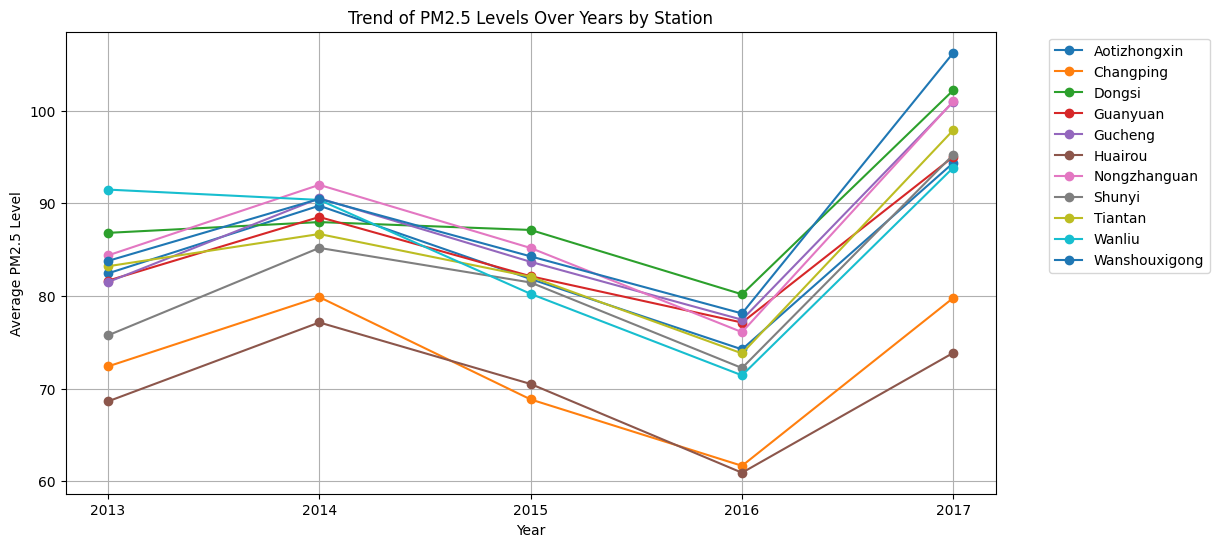

In [33]:
import matplotlib.ticker as ticker

# Group data by year and station, then calculate the mean PM2.5 level
yearly_pollution = df.groupby(['year', 'station'])['PM2.5'].mean().reset_index()

# Create a list of all years present in the dataset
all_years = sorted(df['year'].unique())

# Create a list to store the years with no data points for each station
years_with_no_data = []

for station in yearly_pollution['station'].unique():
    station_data = yearly_pollution[yearly_pollution['station'] == station]
    station_years = station_data['year'].unique()
    missing_years = [year for year in all_years if year not in station_years]
    years_with_no_data.extend([(station, year) for year in missing_years])


# Plotting
plt.figure(figsize=(12, 6))
for station in yearly_pollution['station'].unique():
  station_data = yearly_pollution[yearly_pollution['station'] == station]
  plt.plot(station_data['year'], station_data['PM2.5'], label=station, marker='o')


# Highlight years with no data
for station, year in years_with_no_data:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)  # Vertical line for missing year
    plt.text(year, plt.ylim()[1] * 0.9, f'{year} (No data for {station})', rotation=90, ha='center', va='top')

plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.title("Trend of PM2.5 Levels Over Years by Station")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()


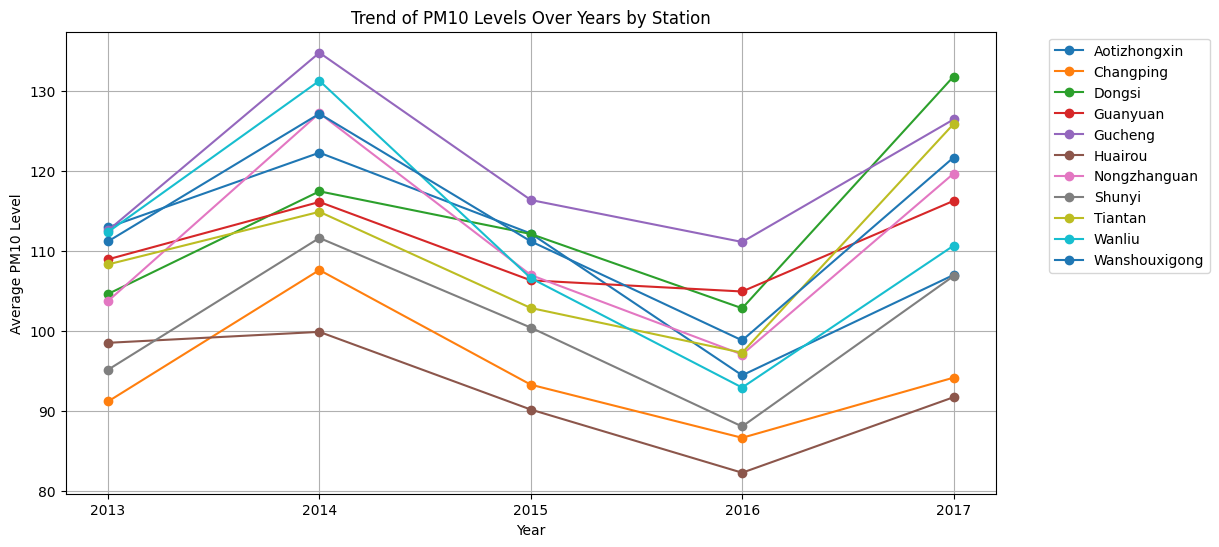

In [34]:
import matplotlib.ticker as ticker

# Group data by year and station, then calculate the mean PM10 level
yearly_pollution = df.groupby(['year', 'station'])['PM10'].mean().reset_index()

# Create a list of all years present in the dataset
all_years = sorted(df['year'].unique())

# Create a list to store the years with no data points for each station
years_with_no_data = []

for station in yearly_pollution['station'].unique():
    station_data = yearly_pollution[yearly_pollution['station'] == station]
    station_years = station_data['year'].unique()
    missing_years = [year for year in all_years if year not in station_years]
    years_with_no_data.extend([(station, year) for year in missing_years])


# Plotting
plt.figure(figsize=(12, 6))
for station in yearly_pollution['station'].unique():
  station_data = yearly_pollution[yearly_pollution['station'] == station]
  plt.plot(station_data['year'], station_data['PM10'], label=station, marker='o')


# Highlight years with no data
for station, year in years_with_no_data:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)  # Vertical line for missing year
    plt.text(year, plt.ylim()[1] * 0.9, f'{year} (No data for {station})', rotation=90, ha='center', va='top')

plt.xlabel("Year")
plt.ylabel("Average PM10 Level")
plt.title("Trend of PM10 Levels Over Years by Station")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()


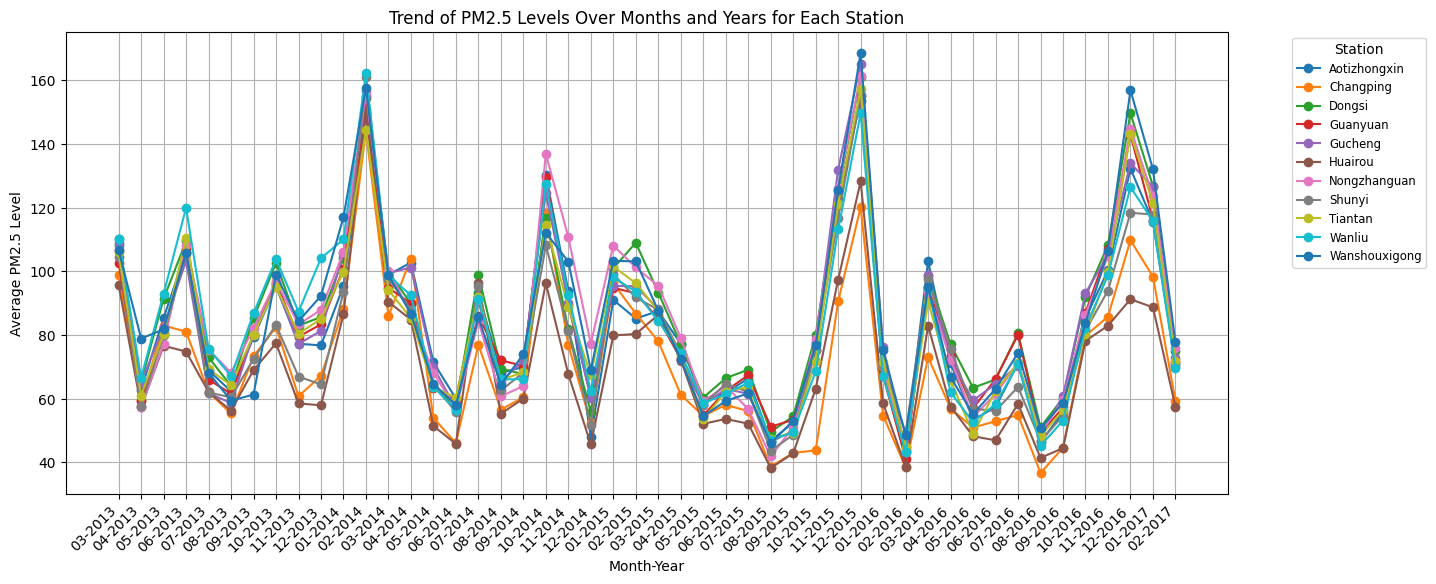

In [35]:
# Group data by year, month, and station, then calculate the mean PM2.5 level
monthly_pollution_by_station = df.groupby(['year', 'month', 'station'])['PM2.5'].mean().reset_index()

# Create a new column combining month and year
monthly_pollution_by_station['month_year'] = pd.to_datetime(monthly_pollution_by_station[['year', 'month']].assign(day=1)).dt.strftime('%m-%Y')

plt.figure(figsize=(15, 6))  # Adjust figure size if needed

for station in monthly_pollution_by_station['station'].unique():
    station_data = monthly_pollution_by_station[monthly_pollution_by_station['station'] == station]
    plt.plot(station_data['month_year'], station_data['PM2.5'], label=station, marker='o')

plt.xlabel("Month-Year")
plt.ylabel("Average PM2.5 Level")
plt.title("Trend of PM2.5 Levels Over Months and Years for Each Station")
plt.legend(title="Station", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Adjust fontsize if needed
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

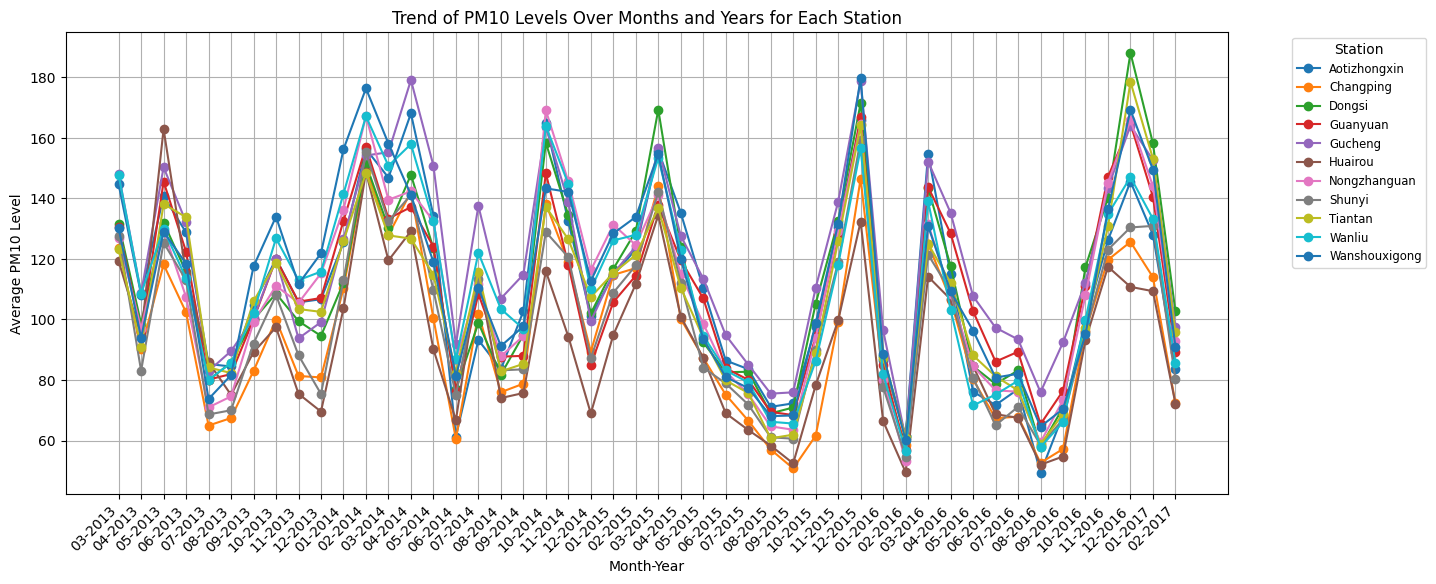

In [36]:
# Group data by year, month, and station, then calculate the mean PM10 level
monthly_pollution_by_station = df.groupby(['year', 'month', 'station'])['PM10'].mean().reset_index()

# Create a new column combining month and year
monthly_pollution_by_station['month_year'] = pd.to_datetime(monthly_pollution_by_station[['year', 'month']].assign(day=1)).dt.strftime('%m-%Y')

plt.figure(figsize=(15, 6))  # Adjust figure size if needed

for station in monthly_pollution_by_station['station'].unique():
    station_data = monthly_pollution_by_station[monthly_pollution_by_station['station'] == station]
    plt.plot(station_data['month_year'], station_data['PM10'], label=station, marker='o')

plt.xlabel("Month-Year")
plt.ylabel("Average PM10 Level")
plt.title("Trend of PM10 Levels Over Months and Years for Each Station")
plt.legend(title="Station", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Adjust fontsize if needed
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

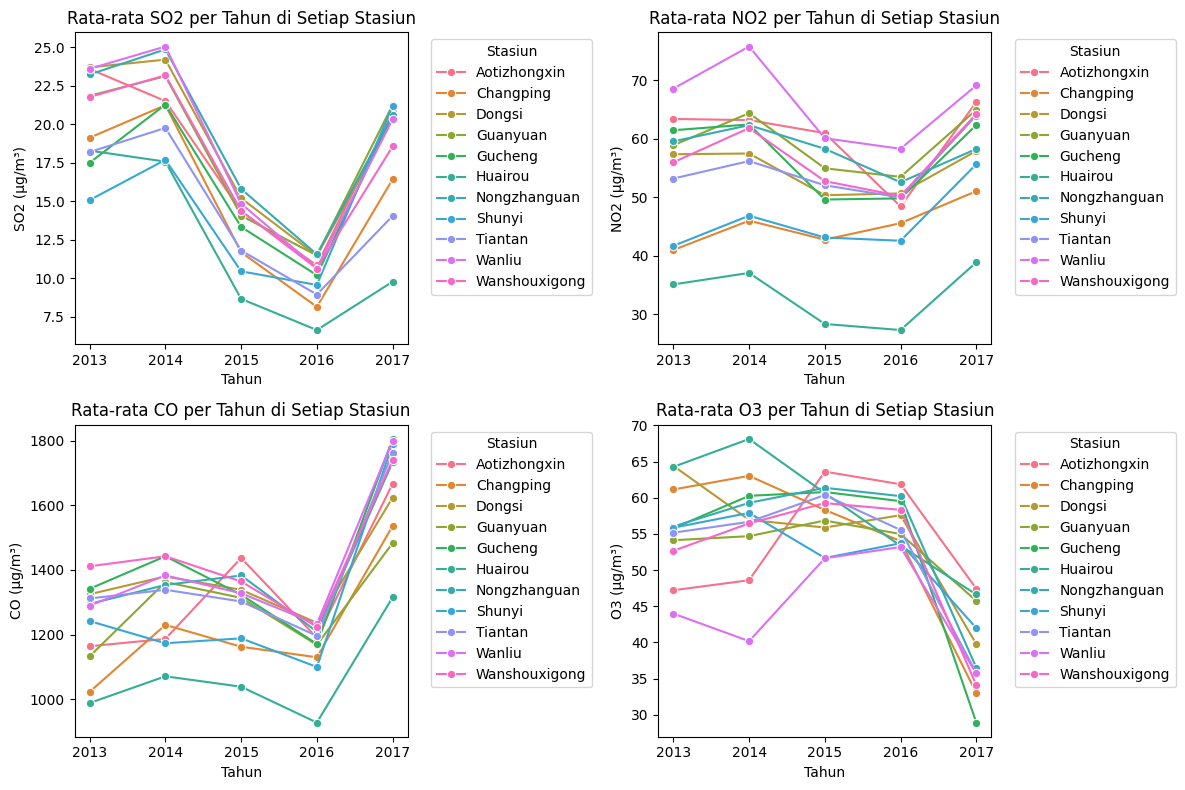

In [37]:
# Gas yang ingin divisualisasikan
gases = ['SO2', 'NO2', 'CO', 'O3']

# Membuat subplot untuk setiap gas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()  # Meratakan array axes untuk memudahkan iterasi

for i, gas in enumerate(gases):
    # Menghitung rata-rata gas per tahun dan stasiun
    yearly_avg = df.groupby(['year', 'station'])[gas].mean().reset_index()

    # Membuat line chart
    sns.lineplot(x='year', y=gas, hue='station', data=yearly_avg, ax=axes[i], marker='o')
    axes[i].set_title(f'Rata-rata {gas} per Tahun di Setiap Stasiun')
    axes[i].set_xlabel('Tahun')
    axes[i].set_ylabel(f'{gas} (µg/m³)')
    axes[i].legend(title='Stasiun', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()

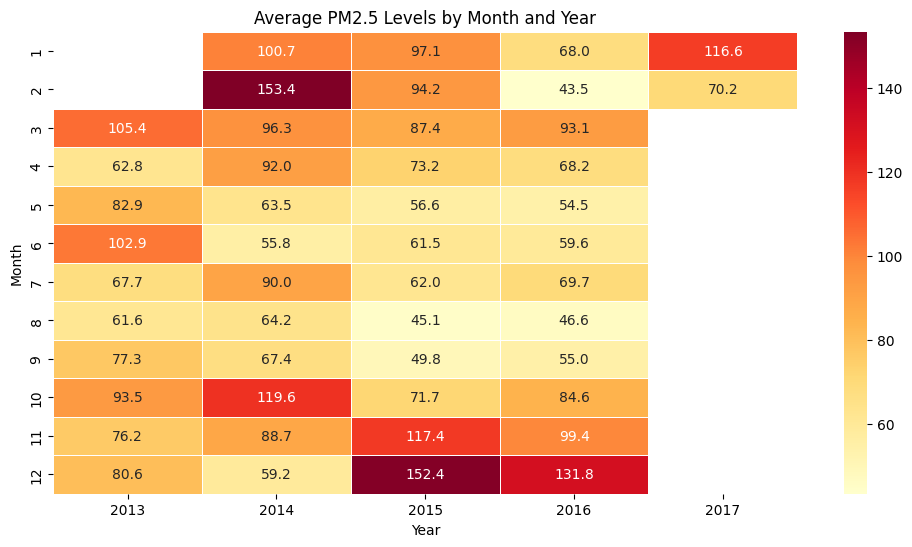

In [38]:
# Group data by year, month, and calculate mean PM2.5
heatmap_data = df.groupby(['year', 'month'])['PM2.5'].mean().reset_index()

# Pivot the data to create a matrix for the heatmap
# Use keyword arguments for index, columns, and values
heatmap_data = heatmap_data.pivot(index="month", columns="year", values="PM2.5")

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".1f", linewidths=.5)
plt.title("Average PM2.5 Levels by Month and Year")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

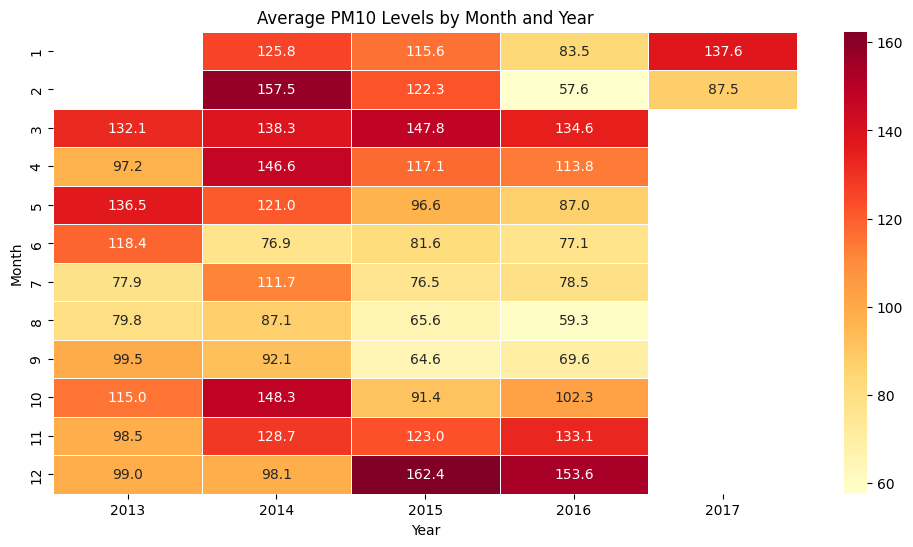

In [39]:
# Group data by year, month, and calculate mean PM10
heatmap_data = df.groupby(['year', 'month'])['PM10'].mean().reset_index()

# Pivot the data to create a matrix for the heatmap
# Use keyword arguments for index, columns, and values
heatmap_data = heatmap_data.pivot(index="month", columns="year", values="PM10")

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".1f", linewidths=.5)
plt.title("Average PM10 Levels by Month and Year")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

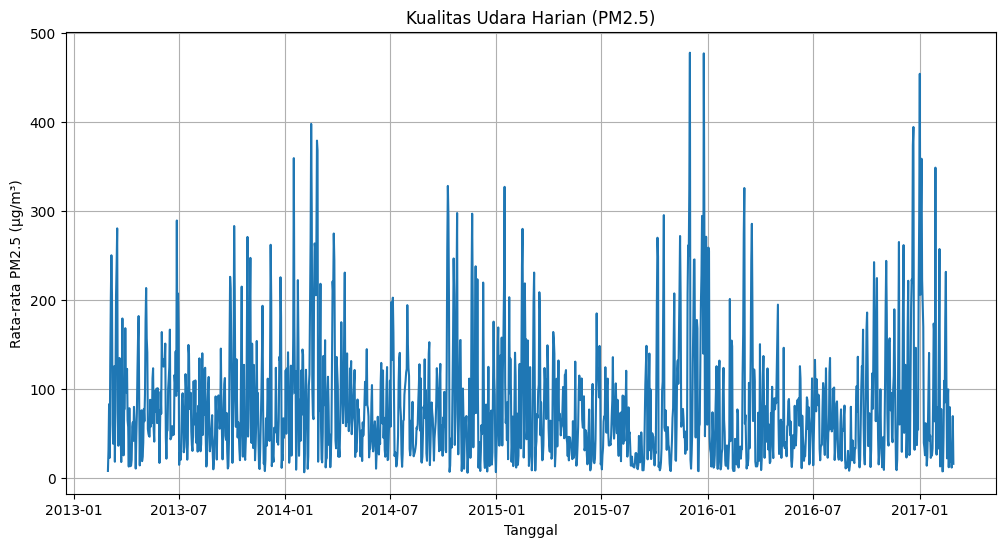

In [40]:
# Kelompokkan data berdasarkan tanggal dan jam, kemudian hitung rata-rata harian PM2.5
daily_avg_pm25 = df.groupby(['year', 'month', 'day'])['PM2.5'].mean().reset_index()

# Buat kolom 'date' dengan menggabungkan tahun, bulan, dan hari
daily_avg_pm25['date'] = pd.to_datetime(daily_avg_pm25[['year', 'month', 'day']])

# Visualisasi menggunakan matplotlib
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_pm25['date'], daily_avg_pm25['PM2.5'])
plt.title('Kualitas Udara Harian (PM2.5)')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata PM2.5 (µg/m³)')
plt.grid(True)
plt.show()

### Pertanyaan 2: Kondisi yang seperti apa yang menyebabkan polusi semakin tinggi

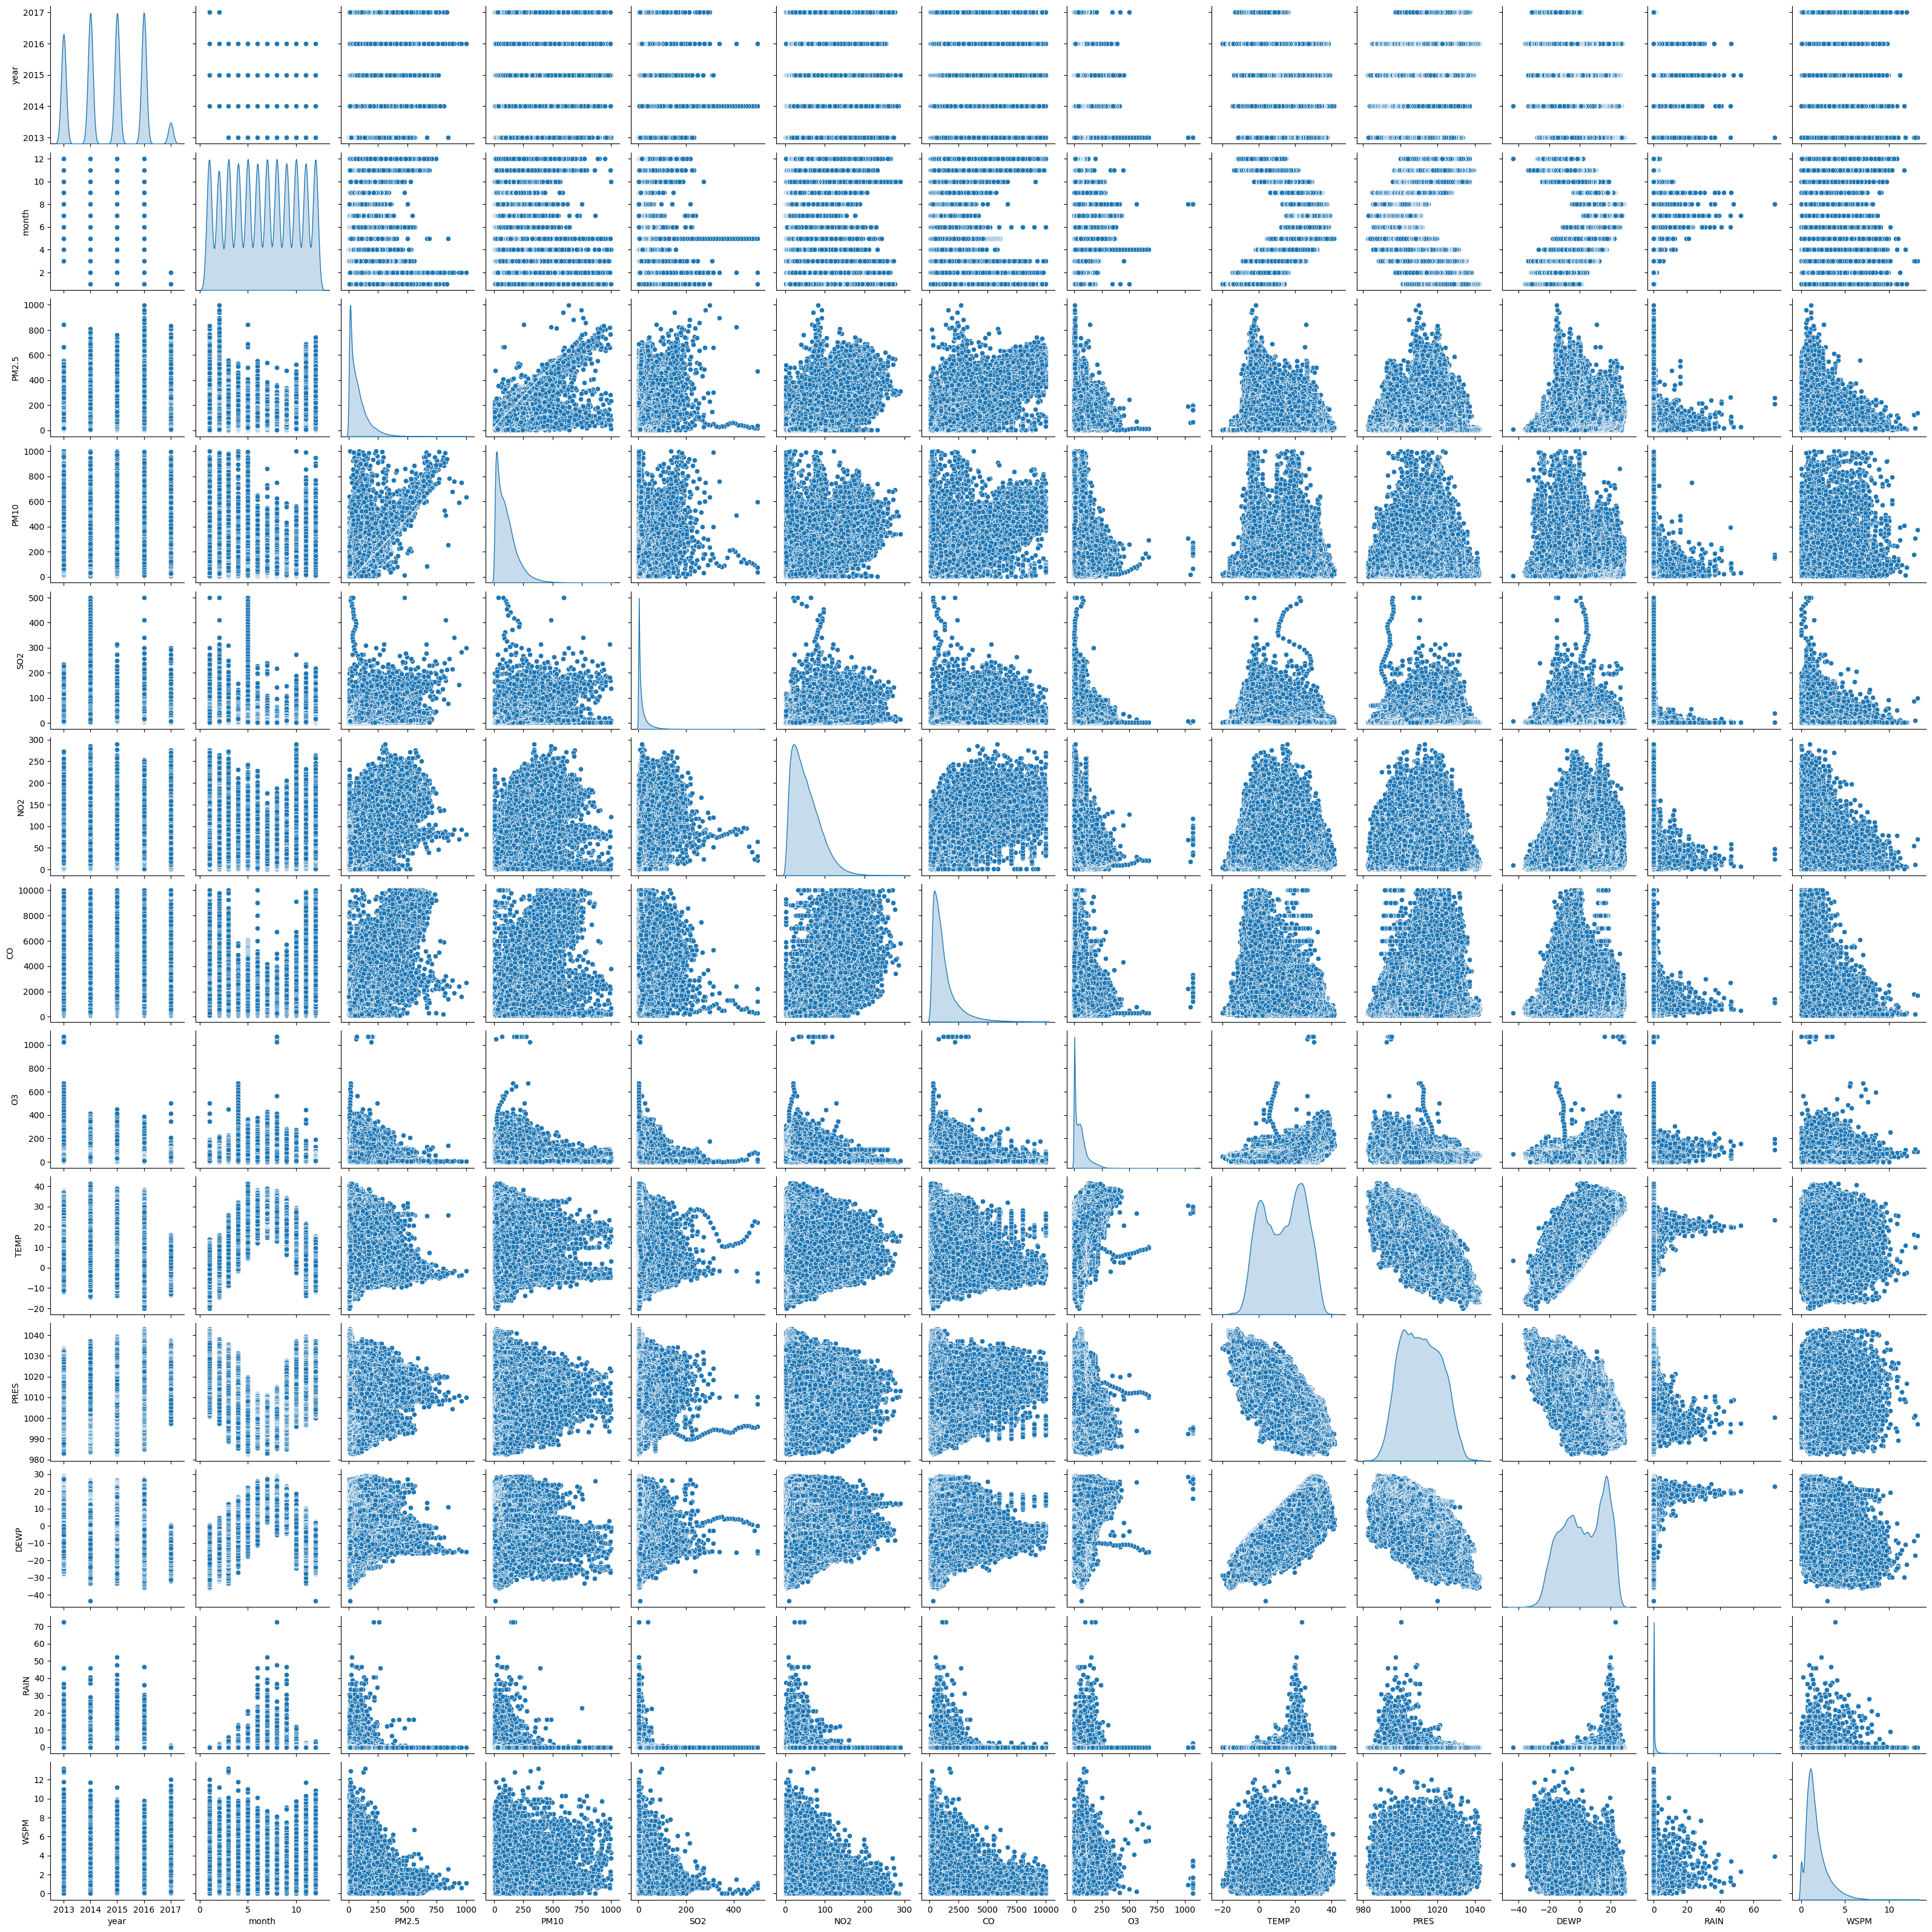

In [41]:
# Analyze the relationship between pollutants and meteorological factors.
# This helps understand the conditions that lead to higher pollution.
sns.pairplot(df[['year','month','PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']], diag_kind='kde')
plt.show()


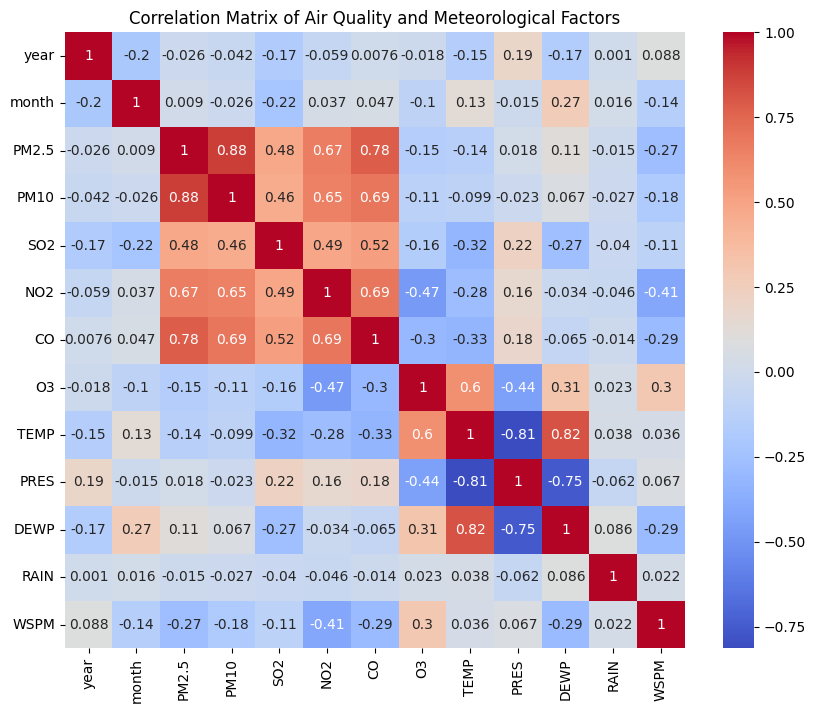

In [42]:
# Investigate the correlation matrix to see which factors are strongly correlated with pollution.
correlation_matrix = df[['year','month','PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.title('Correlation Matrix of Air Quality and Meteorological Factors')
plt.show()


Tabel korelasi menunjukkan hubungan linear antara berbagai faktor kualitas udara dan meteorologi. Nilai 1 menunjukkan korelasi positif sempurna (ketika satu meningkat, yang lain juga meningkat secara proporsional), -1 menunjukkan korelasi negatif sempurna (ketika satu meningkat, yang lain menurun secara proporsional), dan 0 menunjukkan tidak adanya hubungan linear.

Berikut cara menginterpretasikan matriks korelasi yang dihasilkan dalam kode:

* **Strong Positive Correlations:**  Nilai mendekati 1 menunjukkan bahwa dua variabel cenderung meningkat atau menurun bersama-sama. Misalnya, korelasi positif kuat antara PM2.5 dan PM10 menunjukkan bahwa ketika level PM2.5 tinggi, level PM10 juga cenderung tinggi. Hal ini wajar, karena keduanya mewakili partikel di udara, meskipun dengan rentang ukuran yang berbeda.

* **Strong Negative Correlations:** Nilai mendekati -1 menunjukkan hubungan yang berlawanan. Sebagai contoh, korelasi negatif antara suhu (TEMP) dan beberapa polutan mungkin menunjukkan bahwa suhu yang lebih tinggi dapat menyebabkan level polusi yang lebih rendah, atau sebaliknya. Tanda dan besar kecilnya nilai korelasi akan ditunjukkan oleh fungsi sns.heatmap.

* **Weak or No Correlations:** Nilai mendekati 0 menunjukkan sedikit atau tidak ada hubungan linear. Ini tidak berarti tidak ada hubungan sama sekali, hanya saja hubungannya tidak sederhana secara linear. Mungkin ada hubungan lain yang lebih kompleks. Sebagai contoh, hubungan antara arah angin (‘wd’) dan tingkat polusi kemungkinan bukan hubungan linear sederhana dan mungkin membutuhkan analisis lebih lanjut.


<ipython-input-43-7c7a2cc2fabe>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_pollution = df.groupby(pd.cut(df['TEMP'], bins=10))['PM2.5'].mean().reset_index()


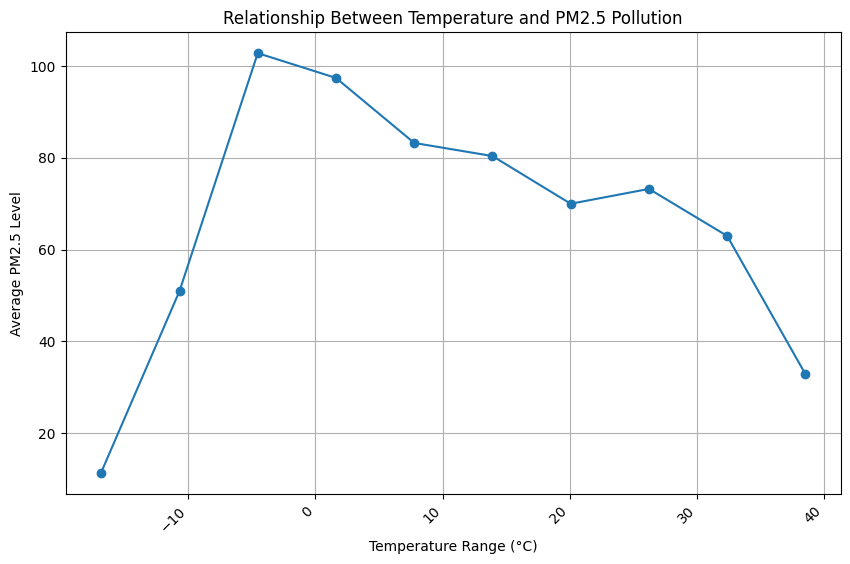

<ipython-input-43-7c7a2cc2fabe>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_pollution = df.groupby(pd.cut(df['TEMP'], bins=10))['PM10'].mean().reset_index()


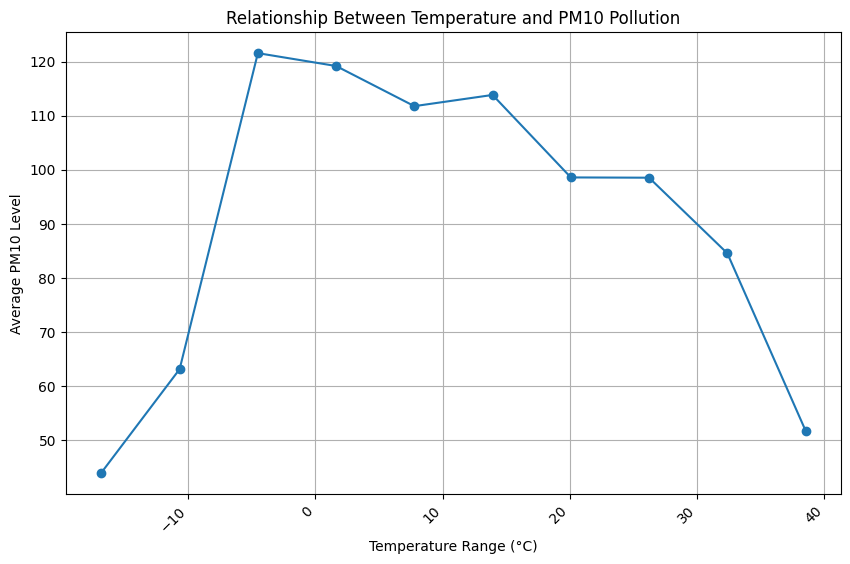

<ipython-input-43-7c7a2cc2fabe>:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_pollution = df.groupby(pd.cut(df['TEMP'], bins=10))['SO2'].mean().reset_index()


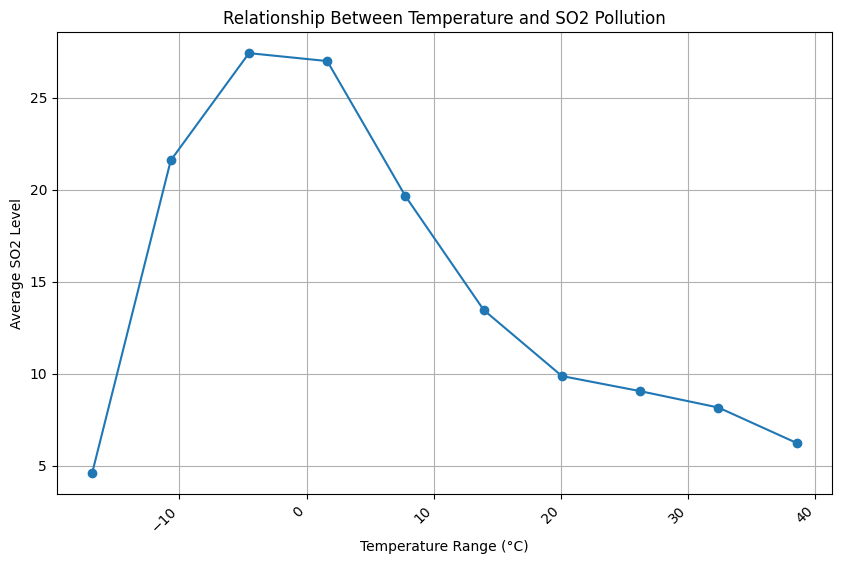

In [43]:
# Group data by temperature ranges and calculate the mean PM2.5 level
temp_pollution = df.groupby(pd.cut(df['TEMP'], bins=10))['PM2.5'].mean().reset_index()

# Rename the 'TEMP' column for better readability
temp_pollution.rename(columns={'TEMP': 'Temperature Range'}, inplace=True)

# Extract the midpoints of the temperature ranges for plotting
# This converts the Interval objects to numeric values
temp_pollution['Temperature Range'] = temp_pollution['Temperature Range'].apply(lambda x: x.mid) # Get the midpoint of each interval

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(temp_pollution['Temperature Range'], temp_pollution['PM2.5'], marker='o')
plt.xlabel("Temperature Range (°C)")
plt.ylabel("Average PM2.5 Level")
plt.title("Relationship Between Temperature and PM2.5 Pollution")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


# Group data by temperature ranges and calculate the mean PM10 level
temp_pollution = df.groupby(pd.cut(df['TEMP'], bins=10))['PM10'].mean().reset_index()

# Rename the 'TEMP' column for better readability
temp_pollution.rename(columns={'TEMP': 'Temperature Range'}, inplace=True)

# Extract the midpoints of the temperature ranges for plotting
# This converts the Interval objects to numeric values
temp_pollution['Temperature Range'] = temp_pollution['Temperature Range'].apply(lambda x: x.mid)  # Get the midpoint of each interval


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(temp_pollution['Temperature Range'], temp_pollution['PM10'], marker='o')
plt.xlabel("Temperature Range (°C)")
plt.ylabel("Average PM10 Level")
plt.title("Relationship Between Temperature and PM10 Pollution")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

# Group data by temperature ranges and calculate the mean SO2 level
temp_pollution = df.groupby(pd.cut(df['TEMP'], bins=10))['SO2'].mean().reset_index()

# Rename the 'TEMP' column for better readability
temp_pollution.rename(columns={'TEMP': 'Temperature Range'}, inplace=True)

# Extract the midpoints of the temperature ranges for plotting
# This converts the Interval objects to numeric values
temp_pollution['Temperature Range'] = temp_pollution['Temperature Range'].apply(lambda x: x.mid)  # Get the midpoint of each interval


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(temp_pollution['Temperature Range'], temp_pollution['SO2'], marker='o')
plt.xlabel("Temperature Range (°C)")
plt.ylabel("Average SO2 Level")
plt.title("Relationship Between Temperature and SO2 Pollution")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

## Analysis Lanjutan (Optional)

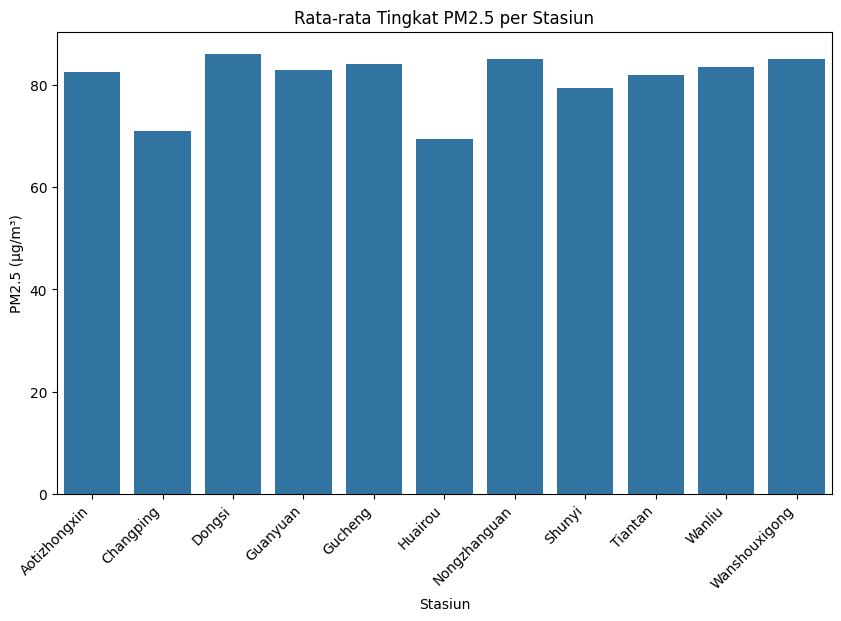

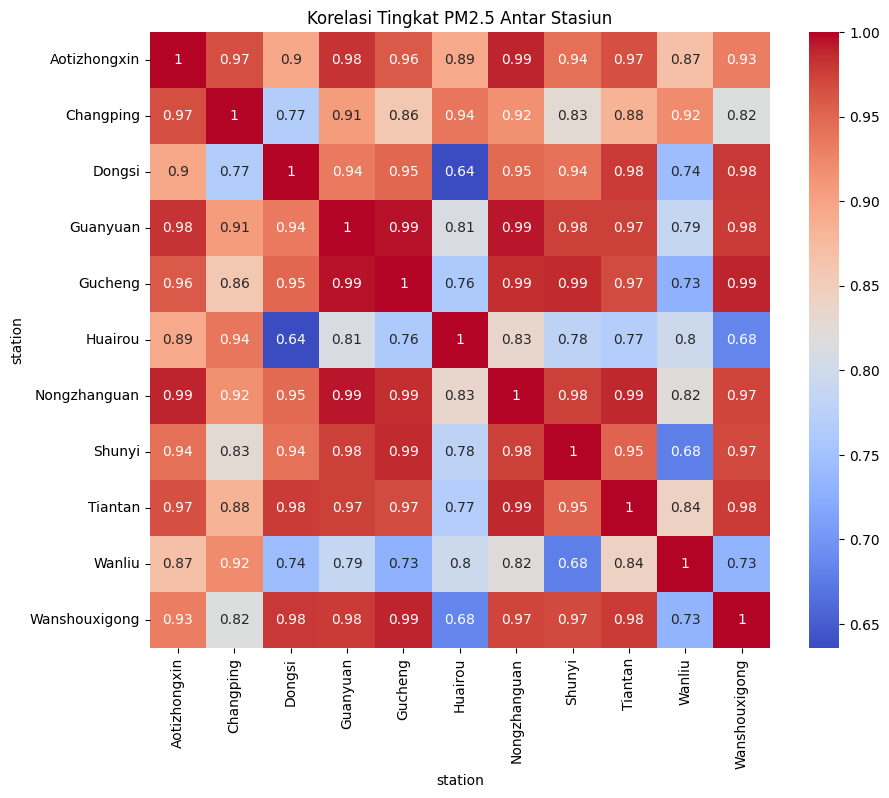

In [44]:
# Rata-rata tingkat PM2.5 per stasiun
avg_pm25_by_station = df.groupby('station')['PM2.5'].mean().reset_index()

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='station', y='PM2.5', data=avg_pm25_by_station)
plt.title('Rata-rata Tingkat PM2.5 per Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Pivot data untuk mendapatkan matriks korelasi
station_pollution = df.pivot_table(index='year', columns='station', values='PM2.5')
correlation_matrix = station_pollution.corr()

# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Tingkat PM2.5 Antar Stasiun')
plt.show()

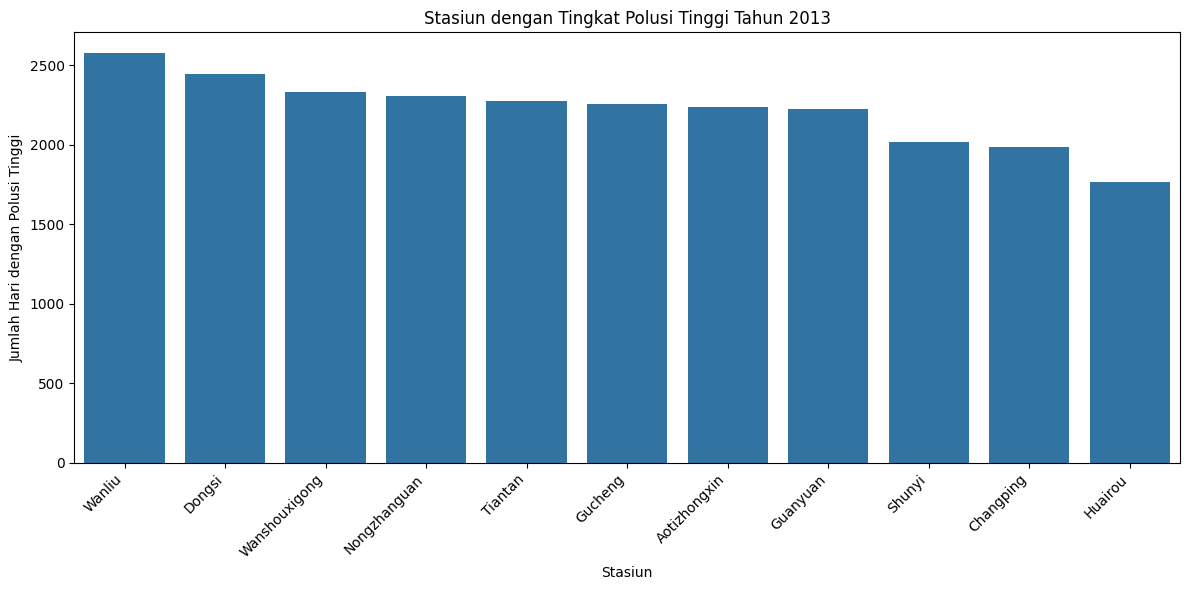

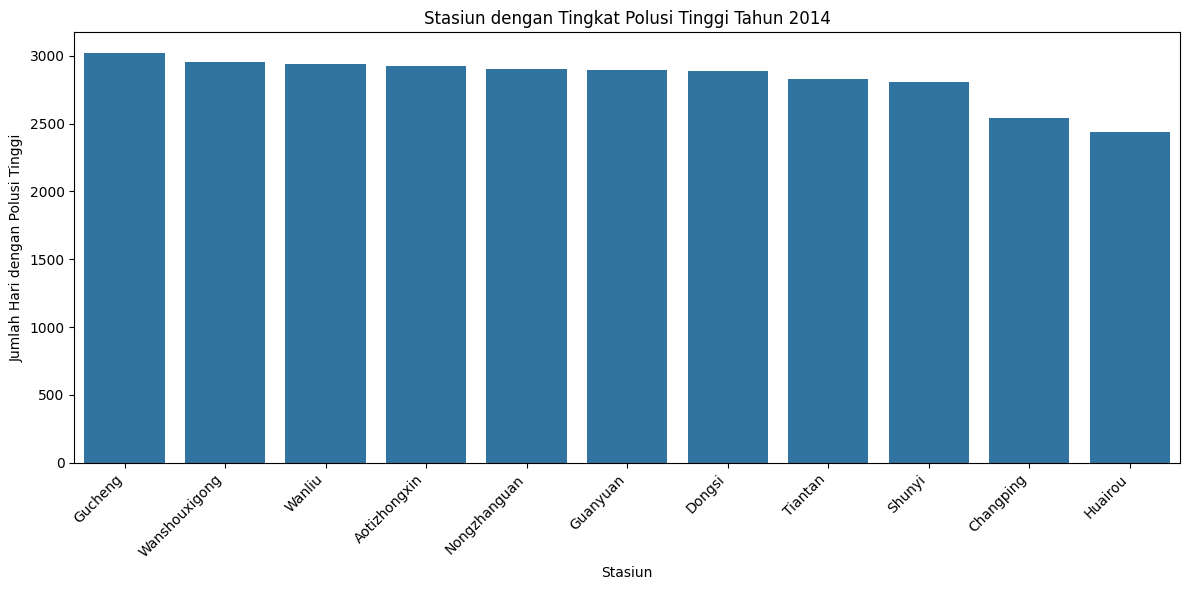

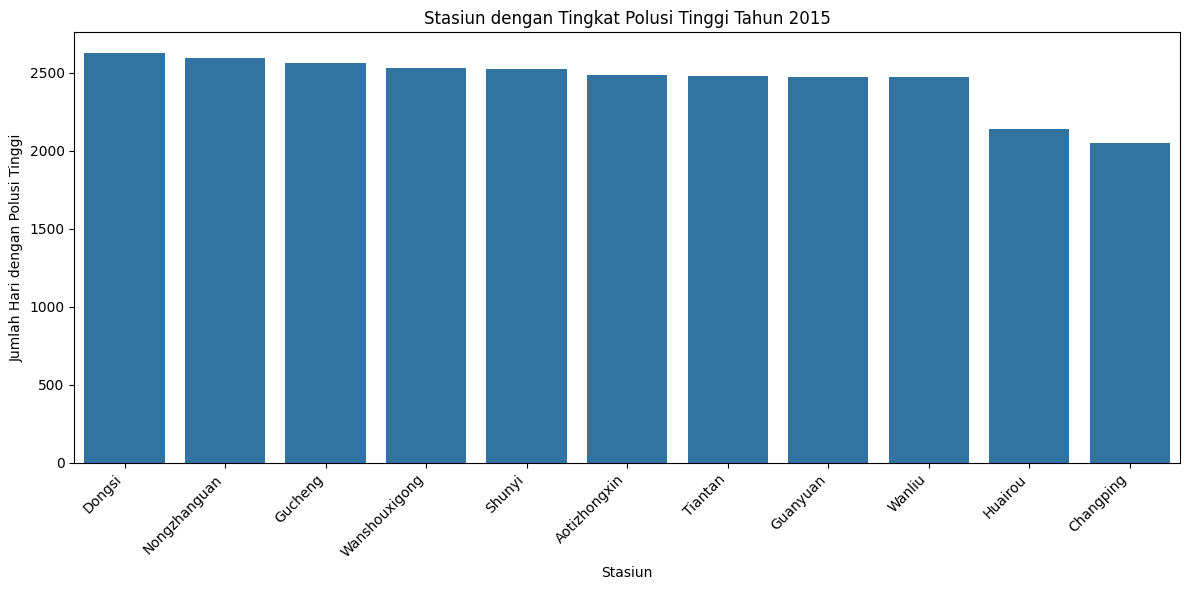

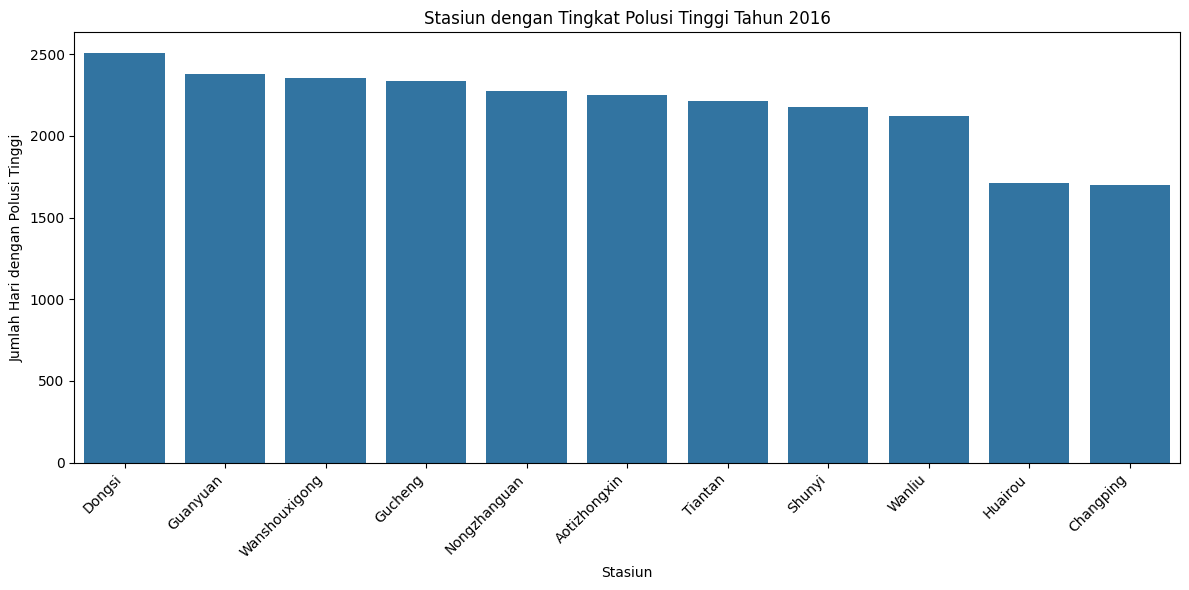

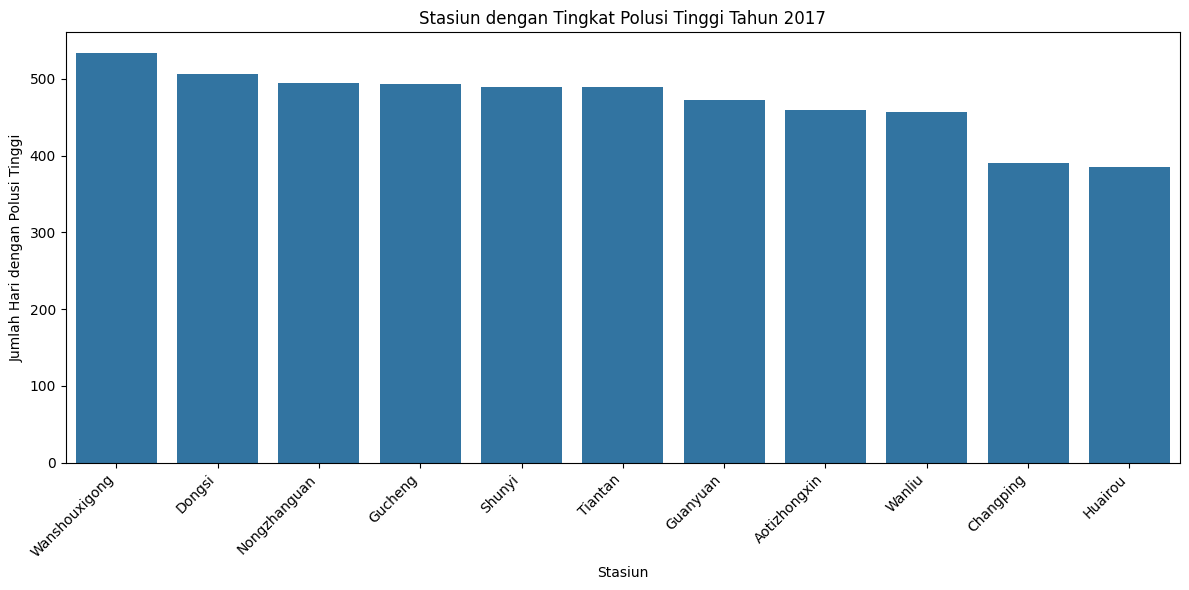

In [45]:
# 1. Tentukan ambang batas PM2.5 untuk polusi tinggi
pm25_threshold = 100

# 2. Buat kolom cluster untuk setiap tahun
for year in df['year'].unique():
    df.loc[(df['year'] == year) & (df['PM2.5'] > pm25_threshold), f'cluster_{year}'] = 1
    df.loc[(df['year'] == year) & (df['PM2.5'] <= pm25_threshold), f'cluster_{year}'] = 0

# 3. Buat diagram batang untuk masing-masing tahun
cluster_cols = [col for col in df.columns if col.startswith('cluster_')]

for col in cluster_cols:
    year = int(col.replace('cluster_', ''))

    # Hitung jumlah stasiun di setiap cluster
    cluster_counts = df.groupby(['station', col])[col].count().reset_index(name='count')

    # Filter hanya stasiun dengan cluster 1 (polusi tinggi)
    high_pollution_stations = cluster_counts[(cluster_counts[col] == 1)]

    # Urutkan stasiun berdasarkan jumlah (opsional)
    high_pollution_stations = high_pollution_stations.sort_values(by=['count'], ascending=False)

    # Buat diagram batang
    plt.figure(figsize=(12, 6))
    sns.barplot(x='station', y='count', data=high_pollution_stations)
    plt.title(f'Stasiun dengan Tingkat Polusi Tinggi Tahun {year}')
    plt.xlabel('Stasiun')
    plt.ylabel('Jumlah Hari dengan Polusi Tinggi')
    plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar mudah dibaca
    plt.tight_layout()
    plt.show()

## Conclusion

Berdasarkan kode dan analisis yang diberikan, berikut adalah ringkasan kesimpulan:

Kualitas Data dan Pra-pemrosesan:

* Dataset terdiri dari beberapa file CSV dengan header yang sama, yang berhasil digabungkan.
* Kolom ‘No’ dianggap tidak relevan dan dihapus.
* Terdapat sejumlah besar nilai hilang di berbagai kolom polutan (PM2.5, PM10, SO2, NO2, CO, O3). Nilai-nilai ini diatasi dengan interpolasi (interpolasi linear untuk sebagian besar kolom dan pengisian dengan nol untuk kolom RAIN). Nilai arah angin (‘wd’) yang hilang diisi dengan nilai yang paling sering muncul untuk setiap stasiun.
* Tidak ditemukan data duplikat.

Analisis Data Eksploratif (EDA):

* Kode mengeksplorasi tren tingkat polusi (PM2.5 dan PM10) dari waktu ke waktu (tahunan dan bulanan), dikelompokkan berdasarkan stasiun.
* Heatmap menvisualisasikan tingkat polusi rata-rata sepanjang tahun dan bulan, membantu mengidentifikasi pola musiman atau tahunan dalam polusi.
* Pairplot menunjukkan hubungan antara berbagai parameter kualitas udara dan faktor meteorologi.

Temuan & Wawasan Utama:

* **Tren Polusi**: Visualisasi (grafik garis dan heatmap) memperlihatkan tren dalam tingkat PM2.5 dan PM10 di berbagai stasiun dan dari waktu ke waktu. Kode bertujuan mengidentifikasi periode peningkatan atau penurunan polusi serta variasi musiman. Tren spesifik akan tergantung pada data. Kode juga secara khusus memeriksa dan menyoroti periode dengan data yang hilang.
* **Pengaruh Faktor Meteorologi**: Pairplot membantu menvisualisasikan hubungan antara tingkat polusi dan faktor seperti suhu, tekanan, titik embun, curah hujan, dan kecepatan angin. Analisis ini membantu mengidentifikasi potensi korelasi dan menunjukkan kondisi meteorologi yang mungkin berkaitan dengan peningkatan polusi. Sebagai contoh, korelasi antara suhu yang lebih rendah dan peningkatan polusi dapat menunjukkan peningkatan emisi selama bulan-bulan yang lebih dingin.
* **Variasi Spesifik Stasiun**: Analisis dilakukan dengan mempertimbangkan setiap stasiun secara terpisah, memungkinkan identifikasi tren dan pola spesifik untuk masing-masing lokasi, serta menyoroti perbedaan tingkat polusi di berbagai lokasi.
